## NX_series

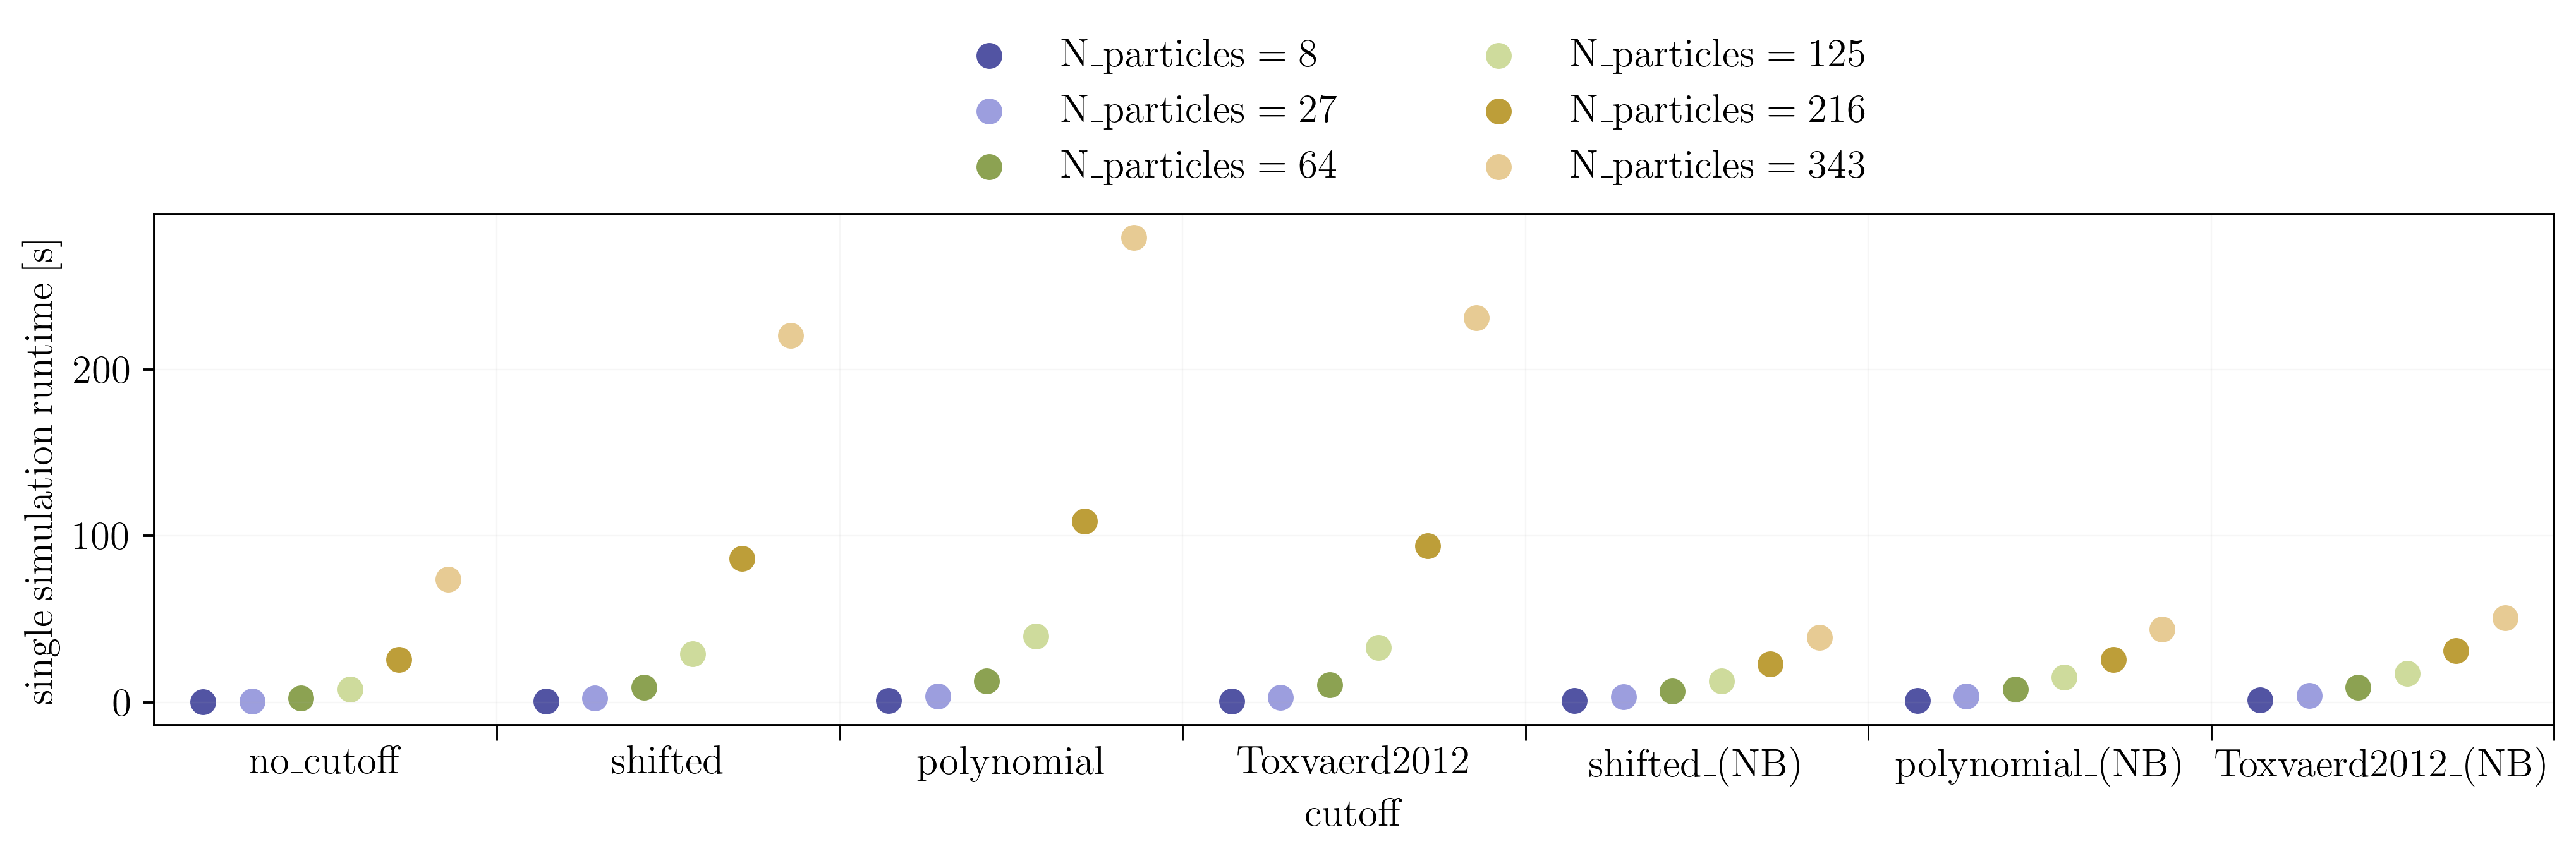

In [17]:
### NX_series ###

import os
path = 'C:/Users/Michal Ptáček/Desktop/images_md'
folder = 'NX_series'

folder = os.path.join(path,folder)

dpi=350
figsize=(14,3)
fontsize=13 
alpha=0.7
width=0.8

savefig=os.path.join(folder, "image_custom_times.png")

yscale='linear'
switch=-1

ordr = [2,5,3,0,6,4,1]
#ordr = None

import pandas as pd
import numpy as np
import os
from matplotlib.ticker import AutoMinorLocator 
import matplotlib.pyplot as plt
from matplotlib import rc
from simplemd_2.utils import format_to_tex, get_colorlist

filename="runtime_data.csv"
filepath = os.path.join(folder, filename)

imported_data = pd.read_csv(filepath, header=0, index_col=[0,1])

level_list = imported_data.index.levels
lengths = np.array([len(i) for i in level_list])
new_order = np.argsort(lengths)[::switch]
sorted_data = imported_data.sort_index(level=[new_order[1],])
data = sorted_data.reorder_levels(new_order[::-1])

level0_labels = data.index.levels[0]
level1_labels = data.index.levels[1]

if ordr is not None:
    data = data.reindex(level1_labels[ordr], level=1)

level1_labels = data.index.levels[1]

colorlist = get_colorlist(9)

n = len(level0_labels)
m = len(level1_labels)

xticks = [i*(n+1) + (n+1)/2 for i in range(m)]
xticks_lab = list()

#level1_labels = ["No cutoff","Cutoff-shift","Cutoff-polynom 

plt.rcParams.update({"text.usetex": True, 'font.size': fontsize})
rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} \usepackage[utf8]{inputenc}' )

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

fig, ax = plt.subplots(num=None, figsize=figsize, dpi=dpi, facecolor='w', edgecolor='k')
plt.yscale(yscale)

for i, key in enumerate(level0_labels):
    dd = data.loc[key]

    #tickpos = i*(n+1) + (n+1)/2
    #xticks.append(tickpos)
    xticks_lab.append(format_to_tex("{name}={key}".format(name=level0_labels.name, key=key)))
    #posi = ticks[i*(n+1):(i+1)*(n+1)-1]
    
    end = n*(m+1)
    posi = np.arange(i, end, n+1) 
    
    plt.scatter(y=dd.to_numpy().mean(axis=1), x=posi+1, label=format_to_tex(key), color=colorlist[i], s=55)


#####   
# from scipy.interpolate import interp1d
# from scipy.interpolate import Akima1DInterpolator
# from scipy.interpolate import UnivariateSpline

    
# data2 = data.reorder_levels([1,0])
# data3 = data2.sort_index(level=0).reindex(level1_labels, level=0)  

# for j, key in enumerate(level1_labels):
#     dd = data3.loc[key]
#     xax = [j*(n+1) + k+1 for k in range(n)]
#     #f = interp1d(xax, dd.mean(axis=1).T)
#     #f = UnivariateSpline(xax, dd.mean(axis=1).T, )
#     f = Akima1DInterpolator(xax, dd.mean(axis=1).T, extrapolate=True)
    
#     new_xax = np.linspace(xax[0]-0.5, xax[-1]+0.5, 50)
#     plt.plot(new_xax, f(new_xax), color='red', alpha=0.4)
    
    
ax.set_xlim(0, end+1)
ax.set_xticks(xticks)
ax.set_xticklabels([format_to_tex(x) for x in level1_labels])

def format_legend_label(indexing):
    labels = ["{key}={value}".format(key=indexing.name, value=i) for i in indexing.values]
    return labels



handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, 
          xticks_lab,
          frameon=False, loc="lower center", ncol=2, bbox_to_anchor=(0.53, 0.9), borderaxespad=0.0, 
          bbox_transform=plt.gcf().transFigure, columnspacing=3,
         )

ax.grid(True, which='major', axis='y', alpha=0.1, linewidth=0.5)
ax.grid(True, which='minor', axis='x', alpha=0.1, linewidth=0.5)

for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

minor_locator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minor_locator) 

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(5)
    tick.tick2line.set_markersize(5)
    tick.label1.set_horizontalalignment('center')

ax.set_xlabel(format_to_tex(data.index.levels[1].name))
ax.set_ylabel(format_to_tex("single simulation runtime [s]"))

if type(savefig) == str:
    from simplemd_2.utils import file_saver
    path = file_saver(os.path.join(folder, savefig))
    plt.savefig(path, dpi=dpi, bbox_inches='tight')

plt.show()

## NW_series

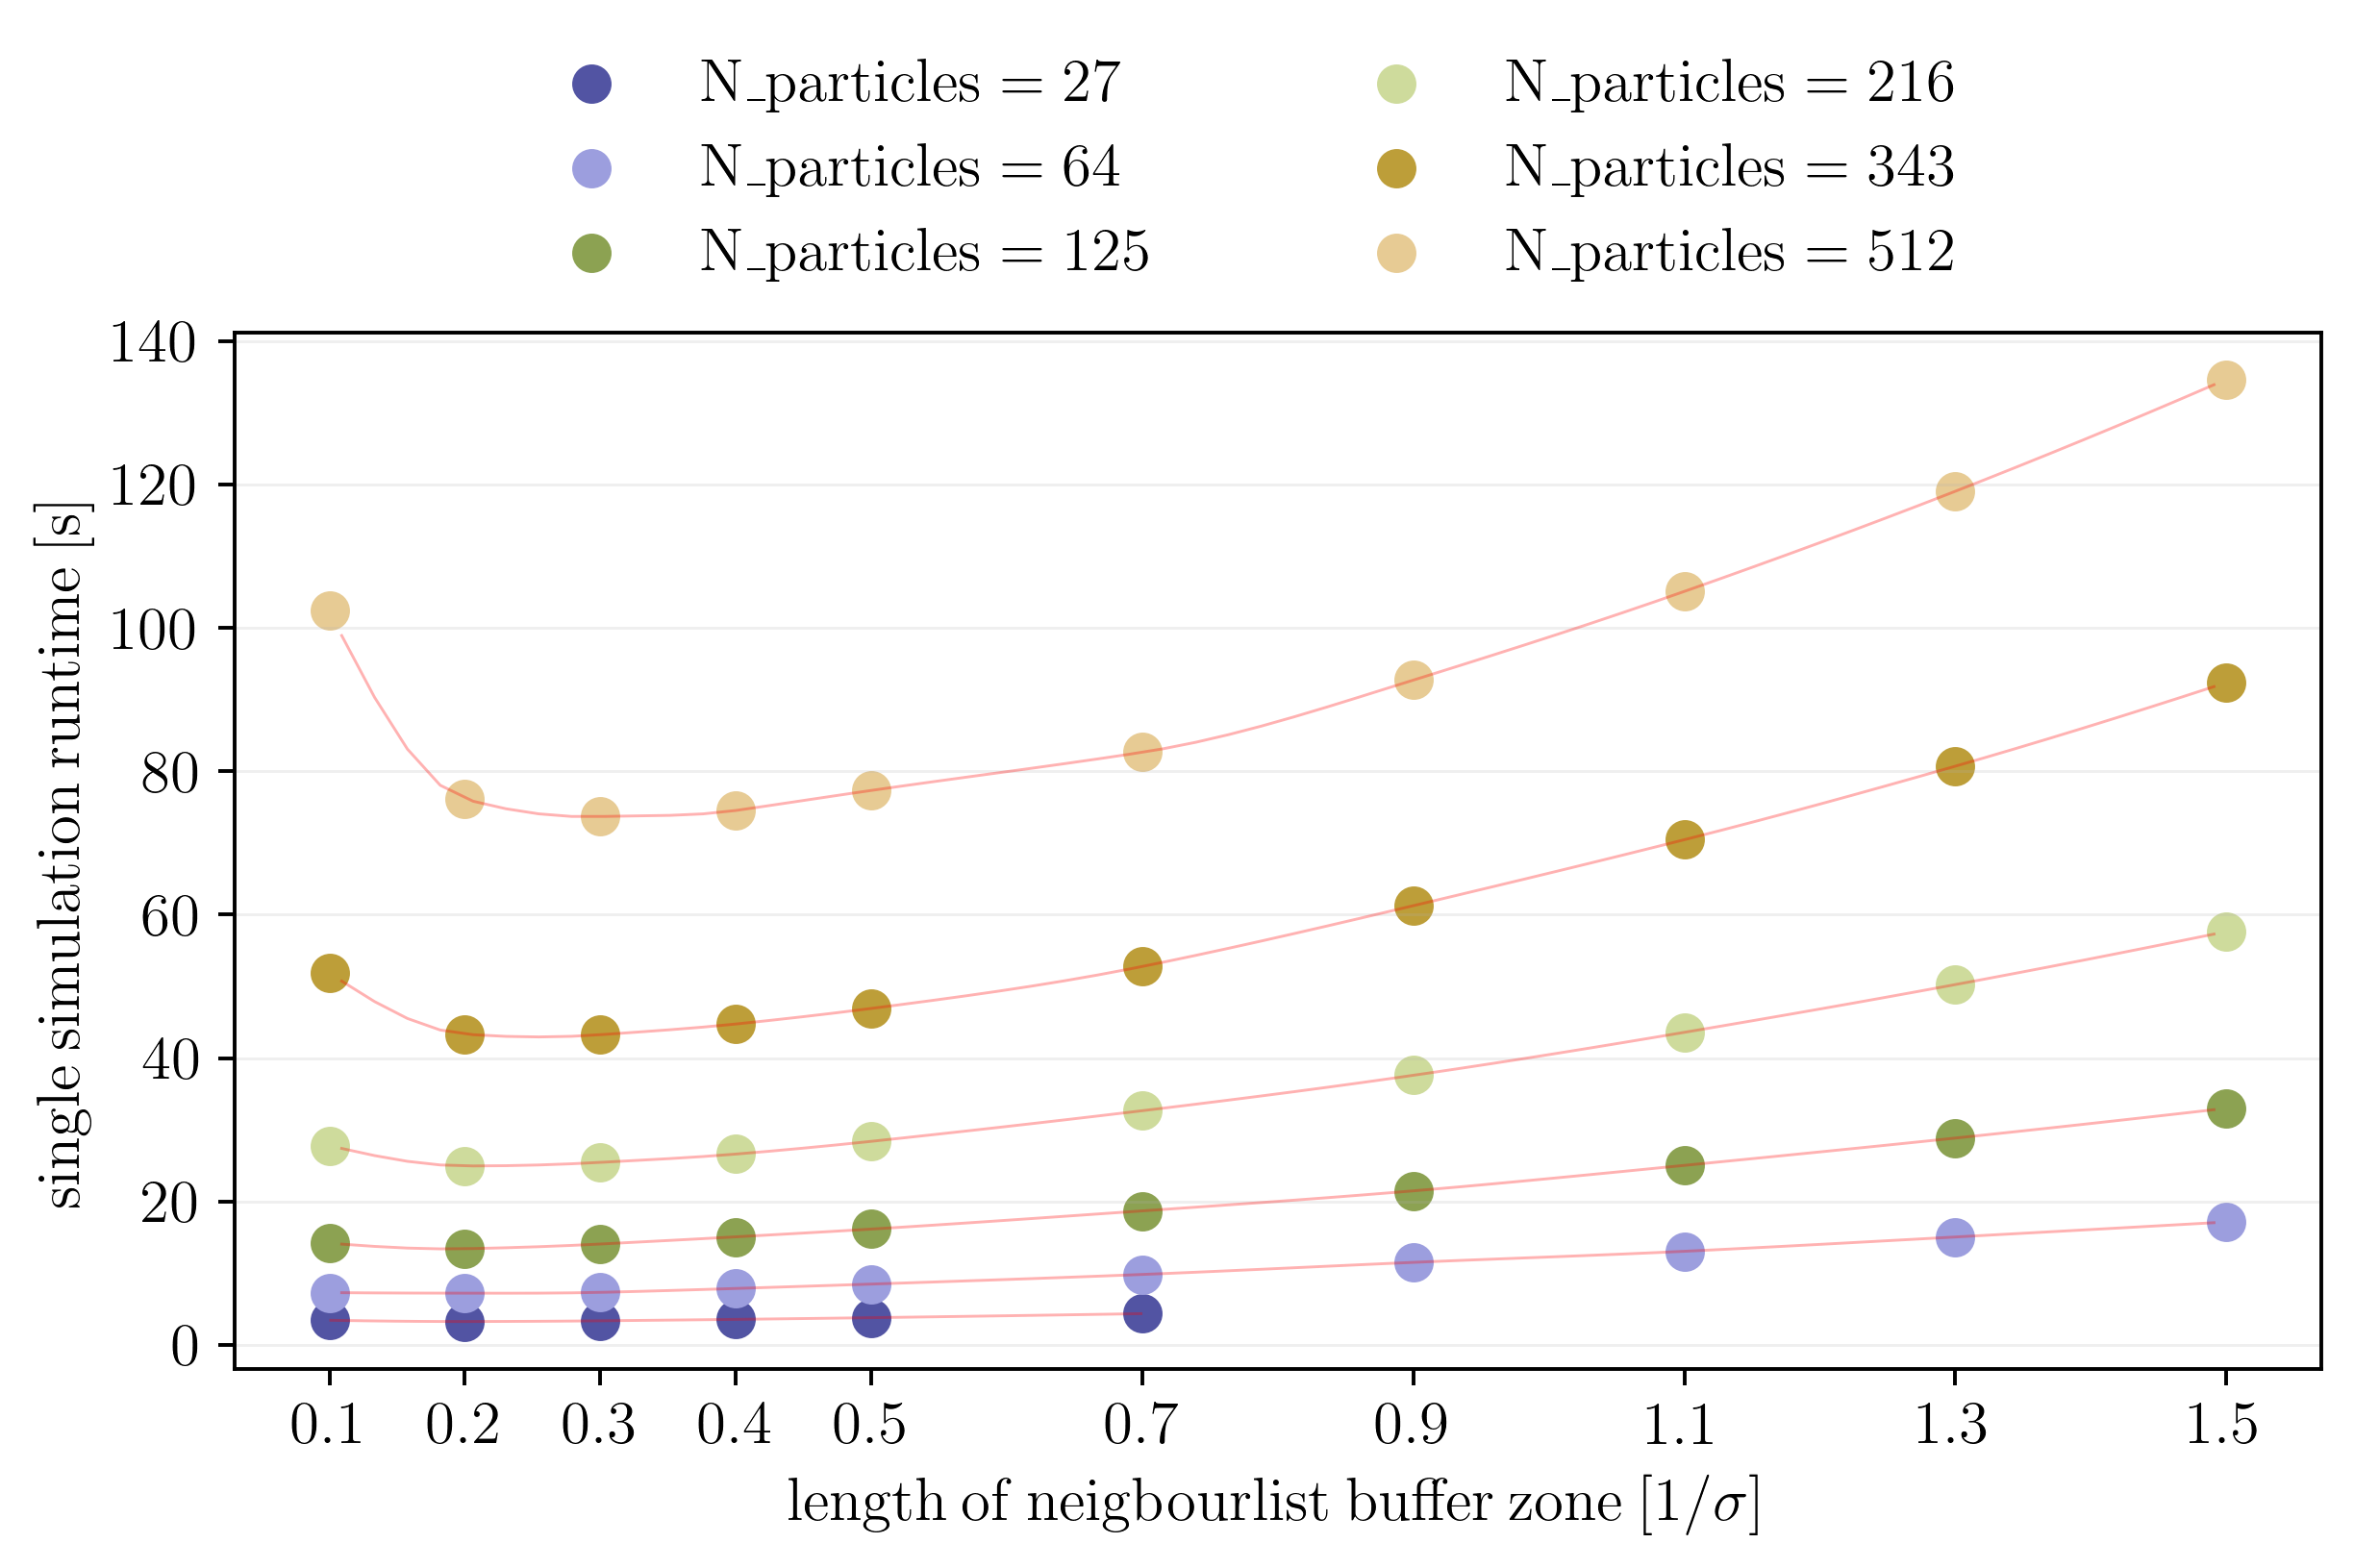

In [19]:
### NW_series ###

import os
path = 'C:/Users/Michal Ptáček/Desktop/images_md'
folder = 'NW_2_manegrot_series'
#folder = 'B_series'


folder = os.path.join(path,folder)

dpi=350
figsize=(8,4)
fontsize=13 
alpha=0.7
width=0.8

#savefig=os.path.join(folder, "image_custom_times.png")
savefig=None

yscale='linear'
switch=-1

import pandas as pd
import numpy as np
import os
from matplotlib.ticker import AutoMinorLocator 
import matplotlib.pyplot as plt
from matplotlib import rc
from simplemd_2.utils import format_to_tex, get_colorlist

filename="runtime_data.csv"
filepath = os.path.join(folder, filename)

imported_data = pd.read_csv(filepath, header=0, index_col=[0,1])

level_list = imported_data.index.levels
lengths = np.array([len(i) for i in level_list])
new_order = np.argsort(lengths)[::switch]
sorted_data = imported_data.sort_index(level=[new_order[1],])
data = sorted_data.reorder_levels(new_order[::-1]).sort_index()

level0_labels = data.index.levels[0]
level1_labels = data.index.levels[1]

level1_labels = data.index.levels[1]

colorlist = get_colorlist(9)

nn = len(level0_labels)
mm = len(level1_labels)

xticks = [i*(nn+1) + (nn+1)/2 for i in range(mm)]
xticks_lab = list()

#level1_labels = ["No cutoff","Cutoff-shift","Cutoff-polynom 
from scipy.interpolate import Akima1DInterpolator
from scipy.interpolate import interp1d

plt.rcParams.update({"text.usetex": True, 'font.size': fontsize})
rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} \usepackage[utf8]{inputenc}' )

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

fig, ax = plt.subplots(num=None, figsize=figsize, dpi=dpi, facecolor='w', edgecolor='k')
plt.yscale(yscale)

for i, key in enumerate(level0_labels):
    dd = data.loc[key]
    xticks_lab.append(format_to_tex("{name}={key}".format(name=level0_labels.name, key=key)))
    m = dd.index.size
    
    ydata = dd.to_numpy().mean(axis=1)
    posi = dd.index
    
    f = Akima1DInterpolator(posi, dd.to_numpy().mean(axis=1))
    new_x = np.linspace(min(posi)-0.5, max(posi)+0.5, 100)
    plt.plot(new_x, f(new_x), color='red', alpha=0.3, linewidth=0.6)
    
    plt.scatter(y=ydata, x=posi, label=format_to_tex(key), color=colorlist[i], s=55)

#ax.set_xlim(0, mm*(nn+1))
ax.set_xticks(data.index.levels[1])
# ax.set_xticklabels([format_to_tex(x) for x in level1_labels])

def format_legend_label(indexing):
    labels = ["{key}={value}".format(key=indexing.name, value=i) for i in indexing.values]
    return labels


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, 
          xticks_lab,
          frameon=False, loc="lower center", ncol=2, bbox_to_anchor=(0.5, 0.9), borderaxespad=0.0, 
          bbox_transform=plt.gcf().transFigure, columnspacing=3,
         )

ax.grid(True, which='major', axis='y', alpha=0.2, linewidth=0.6)
# ax.grid(True, which='minor', axis='x', alpha=0.1, linewidth=0.5)

ax.set_xlabel(format_to_tex("length of neigbourlist buffer zone ")+"$\\left[1/\sigma\\right]$")
ax.set_ylabel(format_to_tex("single simulation runtime [s]"))

if type(savefig) == str:
    from simplemd_2.utils import file_saver
    path = file_saver(os.path.join(folder, savefig))
    plt.savefig(path, dpi=dpi, bbox_inches='tight')

plt.show()

In [3]:
posi

Float64Index([0.01, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5], dtype='float64', name='neighbourlist_buffer_length')

## Potentials from files

In [154]:
import os

pth = 'C:/Users/Michal Ptáček/Desktop/images_md'
#folder = 'TH_series/T/TH03'
folder = 'E_series'

var_name = "variable_settings.json"
def_name = "default_settings.json"

legend_font_size = 12
legend_linewidth = 4.5
fontsize=13
dpi=300
figsize=(12,7)
xfocus = (2.3, 2.55)
#yfocus = [(-0.005, 0.001)]
yfocus = [(-0.020, 0.002)]

r2 = 2.5

xlim = (0.95, 3)
col_start = 1

include_LJ = True
LJ_kwargs = dict(color='black',
                 linewidth=1.8,
                 linestyle='dotted',
                 alpha=0.3
                )

ignore_list = []

savefig = "image_custom_potentials.png"
#savefig = None

C:/Users/Michal Ptáček/Desktop/images_md\E_series ['image_custom_potentials_0.png', 'image_times.png', 'runtime_data.csv', 'toxvaerd.csv']
False False
C:/Users/Michal Ptáček/Desktop/images_md\E_series\E01 ['default_settings.json', 'image_areas.png', 'image_lines.png', 'runtime_data.csv', 'variable_settings.json']
True True
C:/Users/Michal Ptáček/Desktop/images_md\E_series\E02 ['default_settings.json', 'image.png', 'image_0.png', 'toxvaerd.csv', 'variable_settings.json']
True True

Currently active IGNORE LIST:
 []

Legend labels with indices:
 [(1, 'cutoff_cutoff_smoothing--linear__cutoff_cutoff_distance--2.5'), (2, 'cutoff_cutoff_smoothing--polynomial__cutoff_cutoff_distance--2.5'), (3, 'cutoff_cutoff_smoothing--exponential__cutoff_cutoff_distance--2.5'), (4, 'cutoff_cutoff_smoothing--goniometric__cutoff_cutoff_distance--2.5'), (5, 'cutoff_potential--Toxvaerd_2012__cutoff_cutoff_distance--2.5')]


C:\Users\Michal Ptáček\Desktop\MD_rev\MD_2_02\simplemd_2\cutoff.py:82: RuntimeWarning: overflow encountered in exp
  return np.exp(np.abs(c) / x**(2*n))


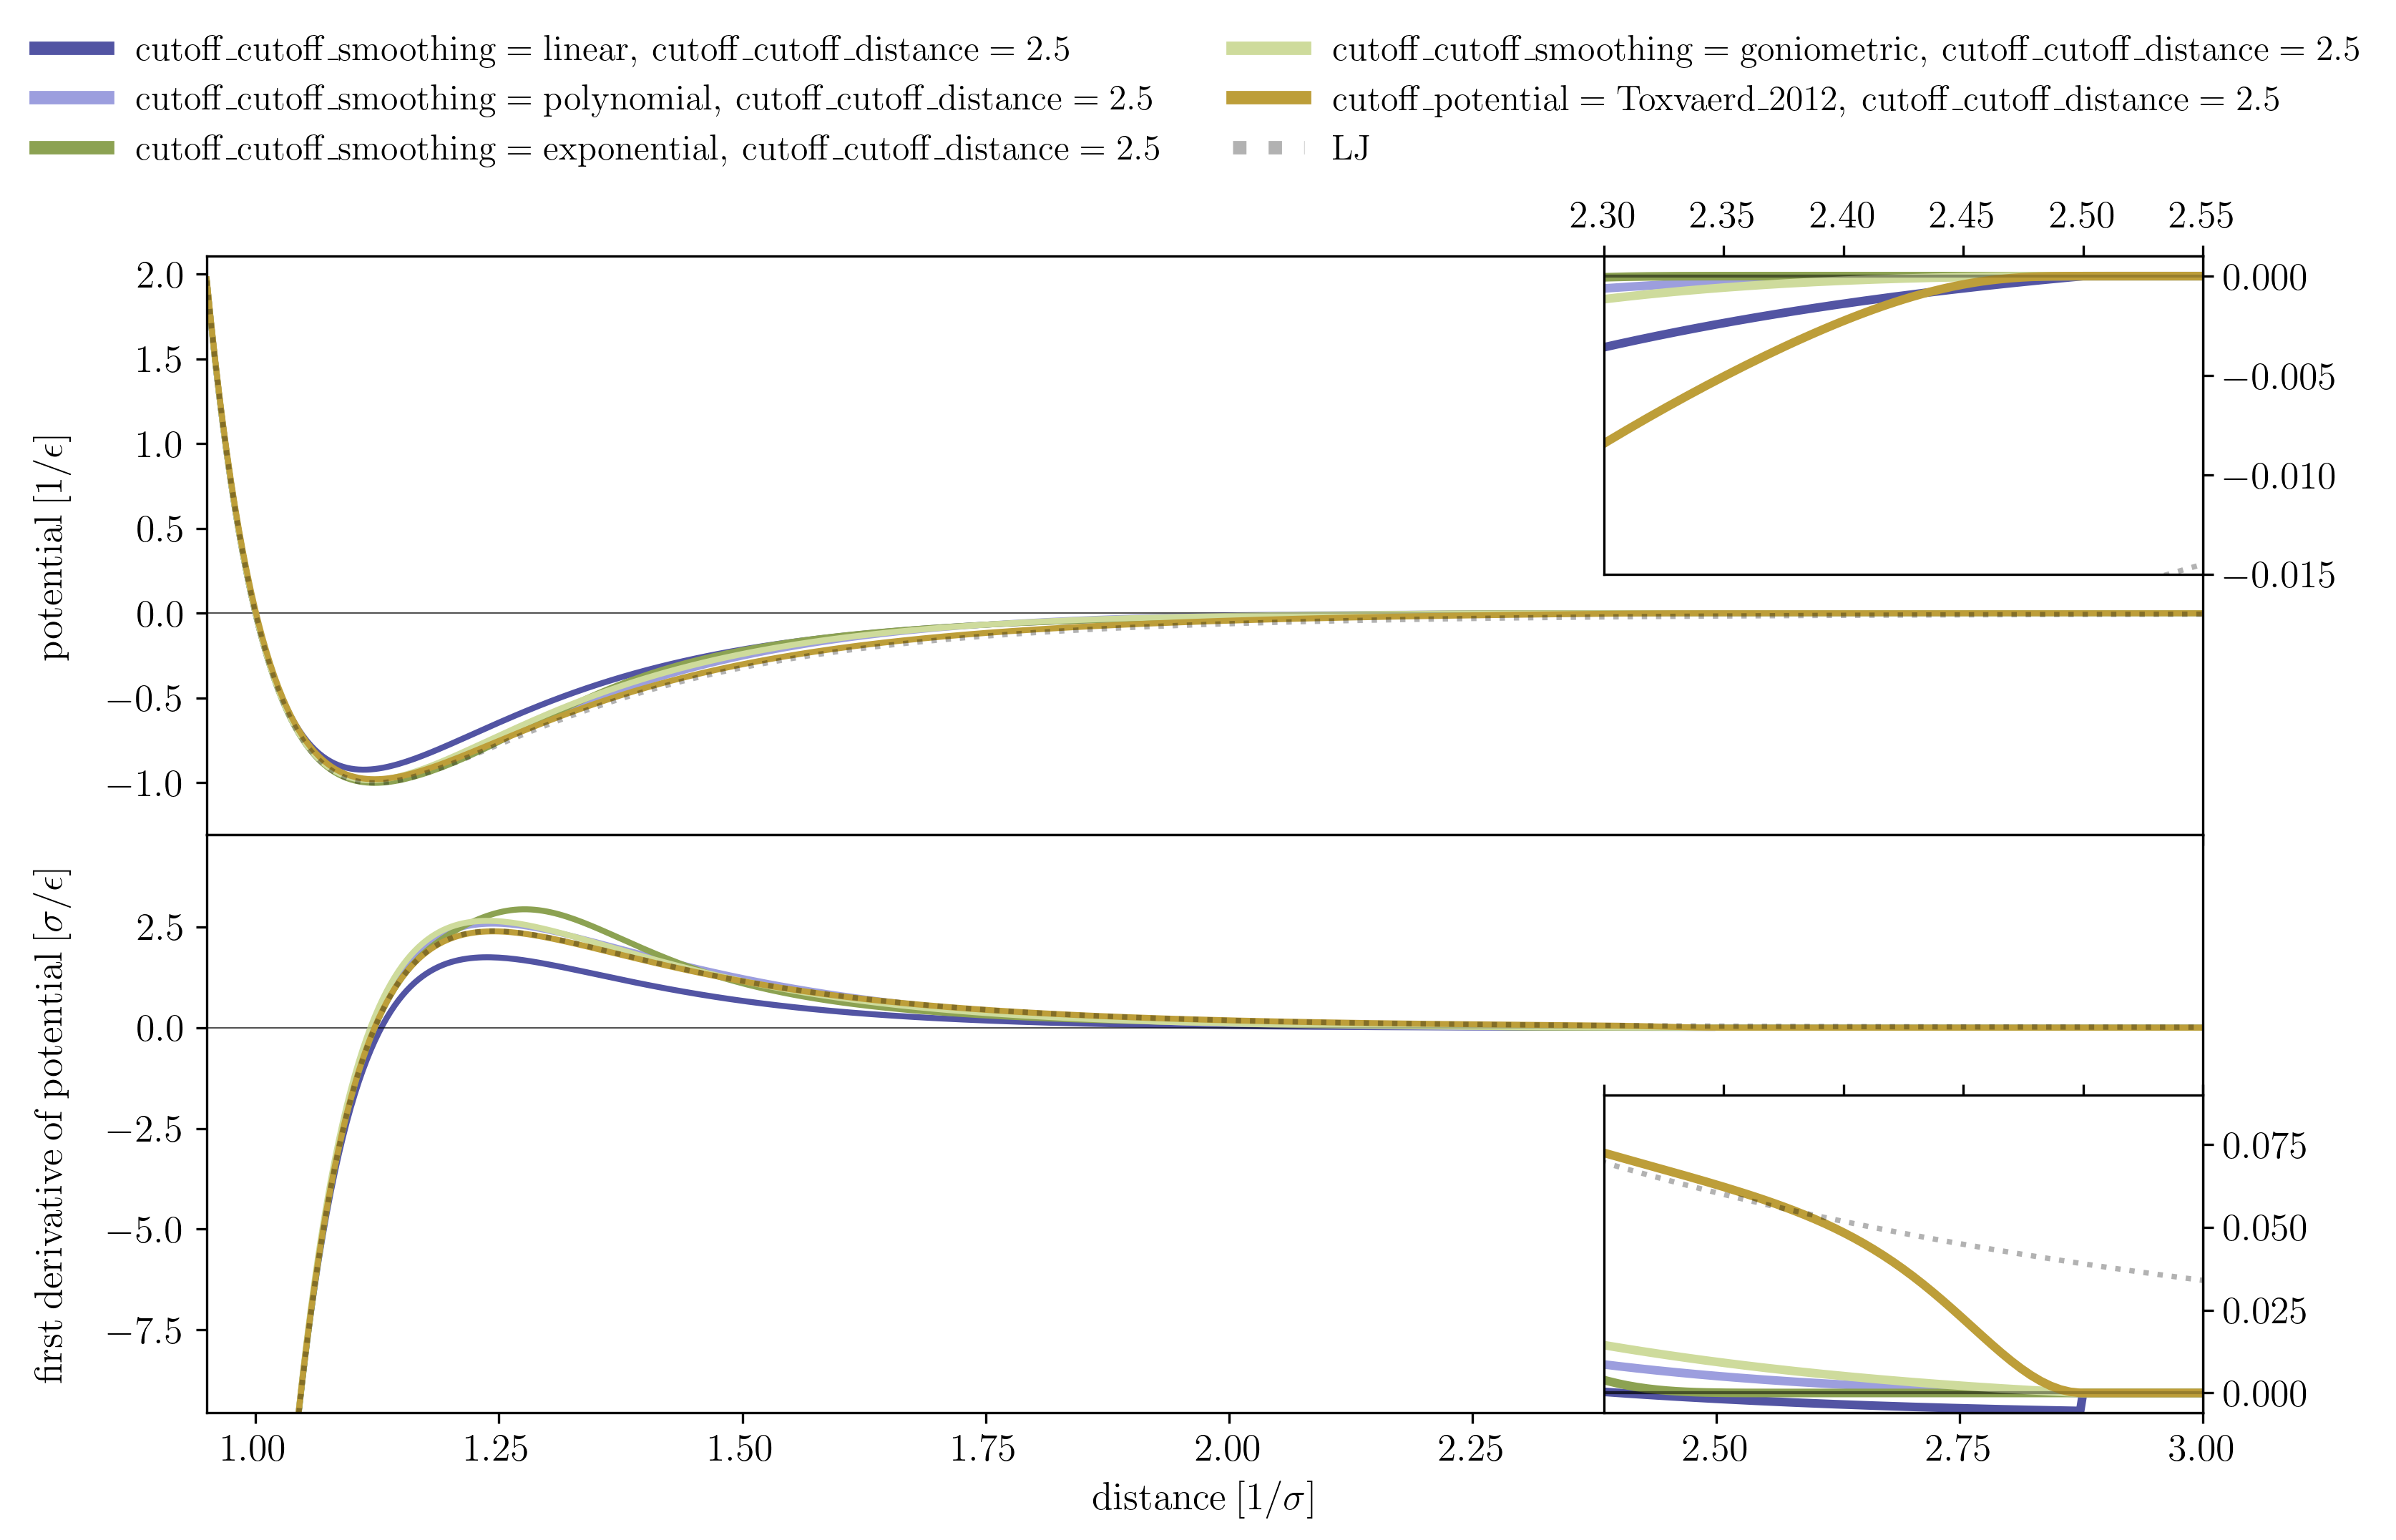

In [19]:
import os, copy
from simplemd_2.io import load_settings_from_json
import simplemd_2 as smd
from matplotlib import rc
from simplemd_2.utils import format_to_tex, get_colorlist, add_points
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

# path = 'C:/Users/Michal Ptáček/Desktop/images_md'
# folder = 'E_series'

folder_path = os.path.join(pth, folder)

# var_name = "variable_settings.json"
# def_name = "default_settings.json"

# legend_font_size = 12
# legend_linewidth = 4.5
# fontsize=13
# dpi=300
# figsize=(13,7)
# xfocus = (2.3, 2.55)
# yfocus = [(-0.005, 0.001)]
# xlim = (0.95, 3)
# col_start = 1

small_ax = [None, None]
yfocus.append(np.sort(-np.array(yfocus[0])*6))
leg_labels = list()

colorlist = get_colorlist(10, start=col_start)
conf_counter = 0

plt.rcParams.update({"text.usetex": True, 'font.size': fontsize})

rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} \usepackage[utf8]{inputenc}' )

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

fig, big_ax = plt.subplots(2,1, sharex=True, gridspec_kw={'hspace':0}, dpi=dpi, figsize=figsize)

for i, aa in enumerate(big_ax):
    small_ax[i] = mpl_il.inset_axes(aa, width='30%', height='55%', loc=i*3+1, borderpad=0)
    small_ax[i].yaxis.tick_right()
    small_ax[i].xaxis.tick_top()
    small_ax[i].set_xlim(xfocus)
    small_ax[i].set_ylim(yfocus[i])
    aa.set_xlim(xlim)

for path, subdirs, files in os.walk(folder_path):
    var_loaded = False
    def_loaded = False
    print(path, files)    
    
    if var_name in files:
        var_settings = load_settings_from_json(os.path.join(path, var_name))
        var_loaded = True
        
    if def_name in files:
        def_settings = load_settings_from_json(os.path.join(path, def_name))
        def_loaded = True
    
    print(var_loaded, def_loaded)
    assert def_loaded is var_loaded, 'One of the settings files is missing from the folder {folder} or has different name than expected.'.format(folder=path)
    
    
    if all([def_loaded, var_loaded]):
        ##################
        
        for id1, (key1, item_list1) in enumerate(var_settings.items()):
            for id2, (key2, item_list2) in enumerate(var_settings.items()):
                if key1 == key2 or id2 < id1:
                    continue

                for item1 in item_list1:
                    for item2 in item_list2:
                        st = def_settings.copy()  

                        key1 = key1.strip("_")
                        key2 = key2.strip("_")

                        if type(item1) == dict:
                            st[key1].update(item1)
                            lab1 = key1 + "_" + list(item1.keys())[0]
                            val1 = list(item1.values())[0]

                        else:
                            st[key1] = item1
                            lab1 = key1
                            val1 = item1

                        if type(item2) == dict:
                            st[key2].update(item2)
                            lab2 = key2 + "_" + list(item2.keys())[0]
                            val2 = list(item2.values())[0]

                        else:
                            st[key2] = item2
                            lab2 = key2
                            val2 = item2
                            
                        item12 = [(lab1, val1), (lab2, val2)]
                        conf_counter += 1
                        
                        str_values = str(lab1)+"--"+str(val1)+"__"+str(lab2)+"--"+str(val2)
                        leg_name = str_values.replace(":","_")
                        
                        leg_labels.append((conf_counter, leg_name))
                        
                        if conf_counter in ignore_list:
                            continue
                                          
                        ###################
                        s = st
                        sc = s['cutoff']

                        if sc['use_cutoff'] is True:
                            potential = smd.Potential(sc['potential'])
                            cutoff = smd.Cutoff(sc['cutoff_distance'],
                                            smooth_length = sc['smoothing_length'],
                                            smooth_type = sc['cutoff_smoothing'],
                                            shift = sc['shift'],
                                            n = sc['n'],
                                            c = sc['c'])
                            interactions = smd.Interactions(potential, cutoff)

                        else:
                            from simplemd_2.utils import format_interaction_function
                            print("")
                            interactions = format_interaction_function(s['interactions'])

                        xdata = np.linspace(*xlim, 500)
                        ydata = np.apply_along_axis(interactions.get_interaction, 0, xdata)  
                        
                        if sc['use_cutoff'] is True:
                            xdata, *ydata = add_points(sc['cutoff_distance'], interactions.get_interaction, xdata, *ydata)

                        for i, aa in enumerate(big_ax):
                            aa.plot([xdata[0], xdata[-1]], [0]*2, color='k', linewidth=0.5, alpha=0.2)
                            small_ax[i].plot(xdata, ydata[i], color = colorlist[conf_counter-1], linewidth=2.9)
                            small_ax[i].plot([xdata[0], xdata[-1]], [0]*2, color='k', linewidth=1.0, alpha=0.2)

                            aa.plot(xdata, ydata[i], label=format_to_tex(leg_name), linewidth= 2.0, color = colorlist[conf_counter-1])

                        big_ax[0].set_ylim(bottom= 4.0 / 3.0 * ydata[0].min() )
                        big_ax[1].set_ylim(bottom= -4.0 * ydata[1].max() )

                        small_ax[1].set_xticklabels([])

if include_LJ is True:
    LJ_pot = smd.Potential("Lennard_Jones")
    #LJ_int = smd.Interactions(LJ_pot, None)
    LJ_xdata = np.linspace(*xlim, 500)
    LJ_ydata =  np.apply_along_axis(LJ_pot, 0, LJ_xdata)
    
    for ax_group in [big_ax, small_ax]:
        for i, axis in enumerate(ax_group):
            axis.plot(LJ_xdata, LJ_ydata[i], label=format_to_tex("LJ"), **LJ_kwargs)
            
                
handles, labels = big_ax[0].get_legend_handles_labels()
newLabels, newHandles = list(), list()
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)         
        handle = copy.copy(handle)
        handle.set_linewidth(legend_linewidth)
        newHandles.append(handle)                       
                        
big_ax[0].legend(newHandles, newLabels,
                 frameon=False, loc="lower center", 
               ncol=2, borderaxespad=0.0, 
               prop={'size': legend_font_size},
               bbox_transform=plt.gcf().transFigure,
               bbox_to_anchor=(0.51,0.93),
              )

labpad = 12.0
big_ax[1].set_xlabel(format_to_tex("distance ")+"$\\left[1/\sigma \\right]$")
big_ax[0].set_ylabel(format_to_tex("potential ")+"$\\left[1/\epsilon \\right]$", labelpad=labpad)
big_ax[1].set_ylabel(format_to_tex("first derivative of potential ")+"$\\left[\sigma/\epsilon \\right]$", labelpad=labpad)

print("\nCurrently active IGNORE LIST:\n", ignore_list)
print("\nLegend labels with indices:\n", leg_labels)

if type(savefig) == str:
    from simplemd_2.utils import file_saver
    save_path = file_saver(os.path.join(folder_path, savefig))
    plt.savefig(save_path, dpi=dpi, bbox_inches='tight')

plt.show()

C:/Users/Michal Ptáček/Desktop/images_md\E_series ['image_custom_potentials.png', 'image_custom_potentials_0.png', 'image_times.png', 'runtime_data.csv', 'toxvaerd.csv']
False False
C:/Users/Michal Ptáček/Desktop/images_md\E_series\E01 ['default_settings.json', 'image_areas.png', 'image_lines.png', 'runtime_data.csv', 'variable_settings.json']
True True
C:/Users/Michal Ptáček/Desktop/images_md\E_series\E02 ['default_settings.json', 'image.png', 'image_0.png', 'toxvaerd.csv', 'variable_settings.json']
True True

Currently active IGNORE LIST:
 []

Legend labels with indices:
 [(1, 'cutoff_cutoff_smoothing--linear__cutoff_cutoff_distance--2.5'), (2, 'cutoff_cutoff_smoothing--polynomial__cutoff_cutoff_distance--2.5'), (3, 'cutoff_cutoff_smoothing--exponential__cutoff_cutoff_distance--2.5'), (4, 'cutoff_cutoff_smoothing--goniometric__cutoff_cutoff_distance--2.5'), (5, 'cutoff_potential--Toxvaerd_2012__cutoff_cutoff_distance--2.5')]


C:\Users\Michal Ptáček\Desktop\MD_rev\MD_2_02\simplemd_2\cutoff.py:82: RuntimeWarning: overflow encountered in exp
  def w(x, c, n):


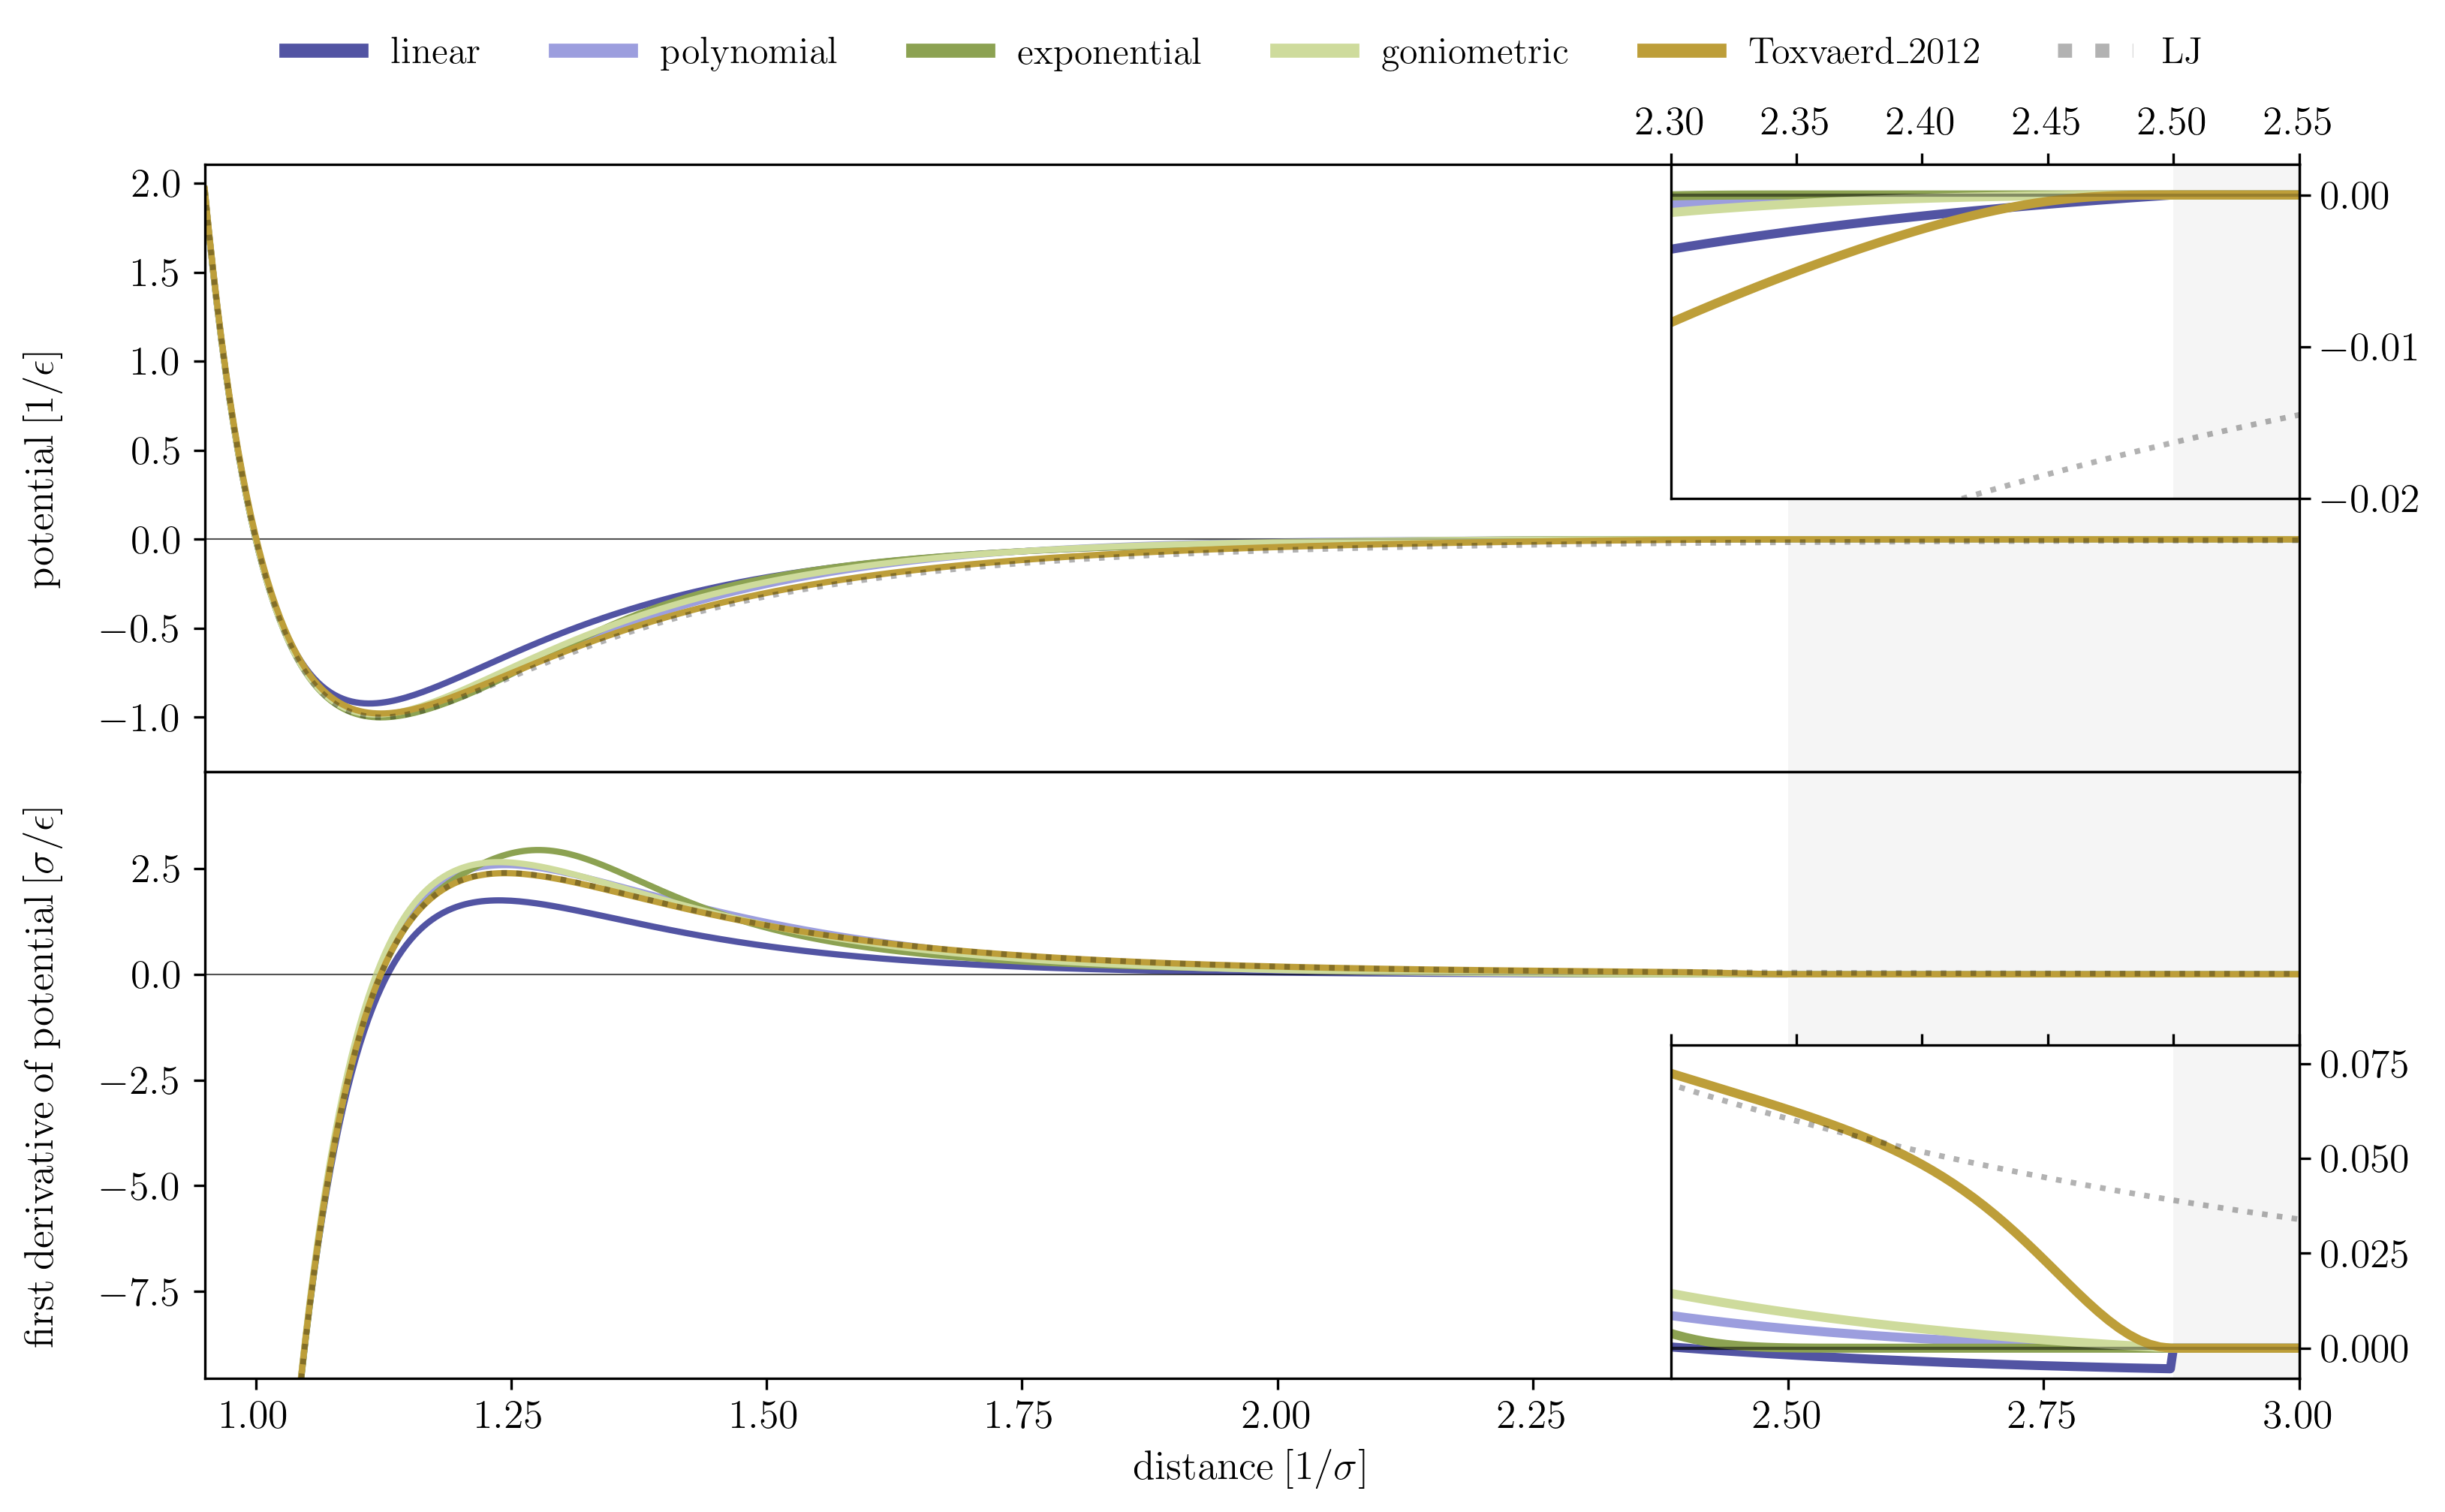

In [155]:
import os, copy
from simplemd_2.io import load_settings_from_json
import simplemd_2 as smd
from matplotlib import rc
import matplotlib.patches as mpatches
from simplemd_2.utils import format_to_tex, get_colorlist, add_points
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

# path = 'C:/Users/Michal Ptáček/Desktop/images_md'
# folder = 'E_series'

folder_path = os.path.join(pth, folder)

# var_name = "variable_settings.json"
# def_name = "default_settings.json"

# legend_font_size = 12
# legend_linewidth = 4.5
# fontsize=13
# dpi=300
# figsize=(13,7)
# xfocus = (2.3, 2.55)
# yfocus = [(-0.005, 0.001)]
# xlim = (0.95, 3)
# col_start = 1

small_ax = [None, None]
yfocus.append(np.sort(-np.array(yfocus[0])*4))
leg_labels = list()

colorlist = get_colorlist(10, start=col_start)
conf_counter = 0

plt.rcParams.update({"text.usetex": True, 'font.size': fontsize})

rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} \usepackage[utf8]{inputenc}' )

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

fig, big_ax = plt.subplots(2,1, sharex=True, gridspec_kw={'hspace':0}, dpi=dpi, figsize=figsize)

behind_cutoff = mpatches.Rectangle((r2, -10), 5, 15, facecolor='gray', alpha=0.08)

for i, aa in enumerate(big_ax):
    small_ax[i] = mpl_il.inset_axes(aa, width='30%', height='55%', loc=i*3+1, borderpad=0)
    small_ax[i].yaxis.tick_right()
    small_ax[i].xaxis.tick_top()
    small_ax[i].set_xlim(xfocus)
    small_ax[i].set_ylim(yfocus[i])
    aa.set_xlim(xlim)

for path, subdirs, files in os.walk(folder_path):
    var_loaded = False
    def_loaded = False
    print(path, files)    
    
    if var_name in files:
        var_settings = load_settings_from_json(os.path.join(path, var_name))
        var_loaded = True
        
    if def_name in files:
        def_settings = load_settings_from_json(os.path.join(path, def_name))
        def_loaded = True
    
    print(var_loaded, def_loaded)
    assert def_loaded is var_loaded, 'One of the settings files is missing from the folder {folder} or has different name than expected.'.format(folder=path)
    
    
    if all([def_loaded, var_loaded]):
        ##################
        
        for id1, (key1, item_list1) in enumerate(var_settings.items()):
            for id2, (key2, item_list2) in enumerate(var_settings.items()):
                if key1 == key2 or id2 < id1:
                    continue

                for item1 in item_list1:
                    for item2 in item_list2:
                        st = def_settings.copy()  

                        key1 = key1.strip("_")
                        key2 = key2.strip("_")

                        if type(item1) == dict:
                            st[key1].update(item1)
                            lab1 = key1 + "_" + list(item1.keys())[0]
                            val1 = list(item1.values())[0]

                        else:
                            st[key1] = item1
                            lab1 = key1
                            val1 = item1

                        if type(item2) == dict:
                            st[key2].update(item2)
                            lab2 = key2 + "_" + list(item2.keys())[0]
                            val2 = list(item2.values())[0]

                        else:
                            st[key2] = item2
                            lab2 = key2
                            val2 = item2
                            
                        item12 = [(lab1, val1), (lab2, val2)]
                        conf_counter += 1
                        
                        str_values = str(lab1)+"--"+str(val1)+"__"+str(lab2)+"--"+str(val2)
                        leg_name = str_values.replace(":","_")
                        
                        leg_labels.append((conf_counter, leg_name))
                        
                        if conf_counter in ignore_list:
                            continue
                                          
                        ###################
                        s = st
                        sc = s['cutoff']

                        if sc['use_cutoff'] is True:
                            potential = smd.Potential(sc['potential'])
                            cutoff = smd.Cutoff(sc['cutoff_distance'],
                                            smooth_length = sc['smoothing_length'],
                                            smooth_type = sc['cutoff_smoothing'],
                                            shift = sc['shift'],
                                            n = sc['n'],
                                            c = sc['c'])
                            interactions = smd.Interactions(potential, cutoff)

                        else:
                            from simplemd_2.utils import format_interaction_function
                            print("")
                            interactions = format_interaction_function(s['interactions'])

                        xdata = np.linspace(*xlim, 500)
                        ydata = np.apply_along_axis(interactions.get_interaction, 0, xdata)  
                        
                        if sc['use_cutoff'] is True:
                            xdata, *ydata = add_points(sc['cutoff_distance'], interactions.get_interaction, xdata, *ydata)

                        for i, aa in enumerate(big_ax):
                            aa.plot([xdata[0], xdata[-1]], [0]*2, color='k', linewidth=0.5, alpha=0.2)
                            small_ax[i].plot(xdata, ydata[i], color = colorlist[conf_counter-1], linewidth=2.9)
                            small_ax[i].plot([xdata[0], xdata[-1]], [0]*2, color='k', linewidth=1.0, alpha=0.2)

                            #aa.plot(xdata, ydata[i], label=format_to_tex(leg_name), linewidth= 2.0, color = colorlist[conf_counter-1])
                            aa.plot(xdata, ydata[i], label=format_to_tex(str(list(item1.values())[0])), linewidth= 2.0, color = colorlist[conf_counter-1])
                            

                        big_ax[0].set_ylim(bottom= 4.0 / 3.0 * ydata[0].min() )
                        big_ax[1].set_ylim(bottom= -4.0 * ydata[1].max() )

                        small_ax[1].set_xticklabels([])

if include_LJ is True:
    LJ_pot = smd.Potential("Lennard_Jones")
    #LJ_int = smd.Interactions(LJ_pot, None)
    LJ_xdata = np.linspace(*xlim, 500)
    LJ_ydata =  np.apply_along_axis(LJ_pot, 0, LJ_xdata)
    
    for ax_group in [big_ax, small_ax]:
        for i, axis in enumerate(ax_group):
            axis.plot(LJ_xdata, LJ_ydata[i], label=format_to_tex("LJ"), **LJ_kwargs)
            
            
for ax_group in [big_ax, small_ax]:
    for axis in ax_group:
        axis.add_patch(copy.copy(behind_cutoff))
                
handles, labels = big_ax[0].get_legend_handles_labels()
newLabels, newHandles = list(), list()
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)         
        handle = copy.copy(handle)
        handle.set_linewidth(legend_linewidth)
        newHandles.append(handle)                       
                        
big_ax[0].legend(newHandles, newLabels,
                 frameon=False, loc="lower center", 
               ncol=6, borderaxespad=0.0, 
               prop={'size': legend_font_size},
               bbox_transform=plt.gcf().transFigure,
               bbox_to_anchor=(0.51,0.93),
              )

labpad = 12.0
big_ax[1].set_xlabel(format_to_tex("distance ")+"$\\left[1/\sigma \\right]$")
big_ax[0].set_ylabel(format_to_tex("potential ")+"$\\left[1/\epsilon \\right]$", labelpad=labpad)
big_ax[1].set_ylabel(format_to_tex("first derivative of potential ")+"$\\left[\sigma/\epsilon \\right]$", labelpad=labpad)

print("\nCurrently active IGNORE LIST:\n", ignore_list)
print("\nLegend labels with indices:\n", leg_labels)

if type(savefig) == str:
    from simplemd_2.utils import file_saver
    save_path = file_saver(os.path.join(folder_path, savefig))
    plt.savefig(save_path, dpi=dpi, bbox_inches='tight')

plt.show()

## TH_series

In [94]:
import os

pth = 'C:/Users/Michal Ptáček/Desktop/images_md'
folder = 'TH_series/T_4pot'
#folder = 'E_series'

var_name = "variable_settings.json"
def_name = "default_settings.json"

legend_font_size = 12
legend_linewidth = 4.5
fontsize=13
dpi=300
figsize=(12,7)
xfocus = (1.45, 4.55)
#yfocus = [(-0.005, 0.001)]
yfocus = [(-0.35, 0.03)]

r2 = 2.5

xlim = (0.95, 4.6)
col_start = 1

include_LJ = True
LJ_kwargs = dict(color='black',
                 linewidth=1.8,
                 linestyle='dotted',
                 alpha=0.3
                )

ignore_list = []

savefig = "image_custom_potentials.png"
#savefig = None

C:/Users/Michal Ptáček/Desktop/images_md\TH_series/T_4pot ['default_settings.json', 'image_custom_potentials.png', 'image_custom_potentials_0.png', 'image_custom_potentials_1.png', 'image_custom_potentials_2.png', 'image_custom_potentials_3.png', 'image_custom_potentials_4.png', 'image_custom_potentials_5.png', 'variable_settings.json']
True True

Currently active IGNORE LIST:
 []

Legend labels with indices:
 [(1, 'cutoff_cutoff_smoothing--None__cutoff_cutoff_distance--1.5'), (2, 'cutoff_cutoff_smoothing--None__cutoff_cutoff_distance--1.8'), (3, 'cutoff_cutoff_smoothing--None__cutoff_cutoff_distance--2.1'), (4, 'cutoff_cutoff_smoothing--None__cutoff_cutoff_distance--2.4'), (5, 'cutoff_cutoff_smoothing--None__cutoff_cutoff_distance--2.7'), (6, 'cutoff_cutoff_smoothing--None__cutoff_cutoff_distance--3.0'), (7, 'cutoff_cutoff_smoothing--None__cutoff_cutoff_distance--3.3'), (8, 'cutoff_cutoff_smoothing--None__cutoff_cutoff_distance--3.6'), (9, 'cutoff_cutoff_smoothing--None__cutoff_cutoff

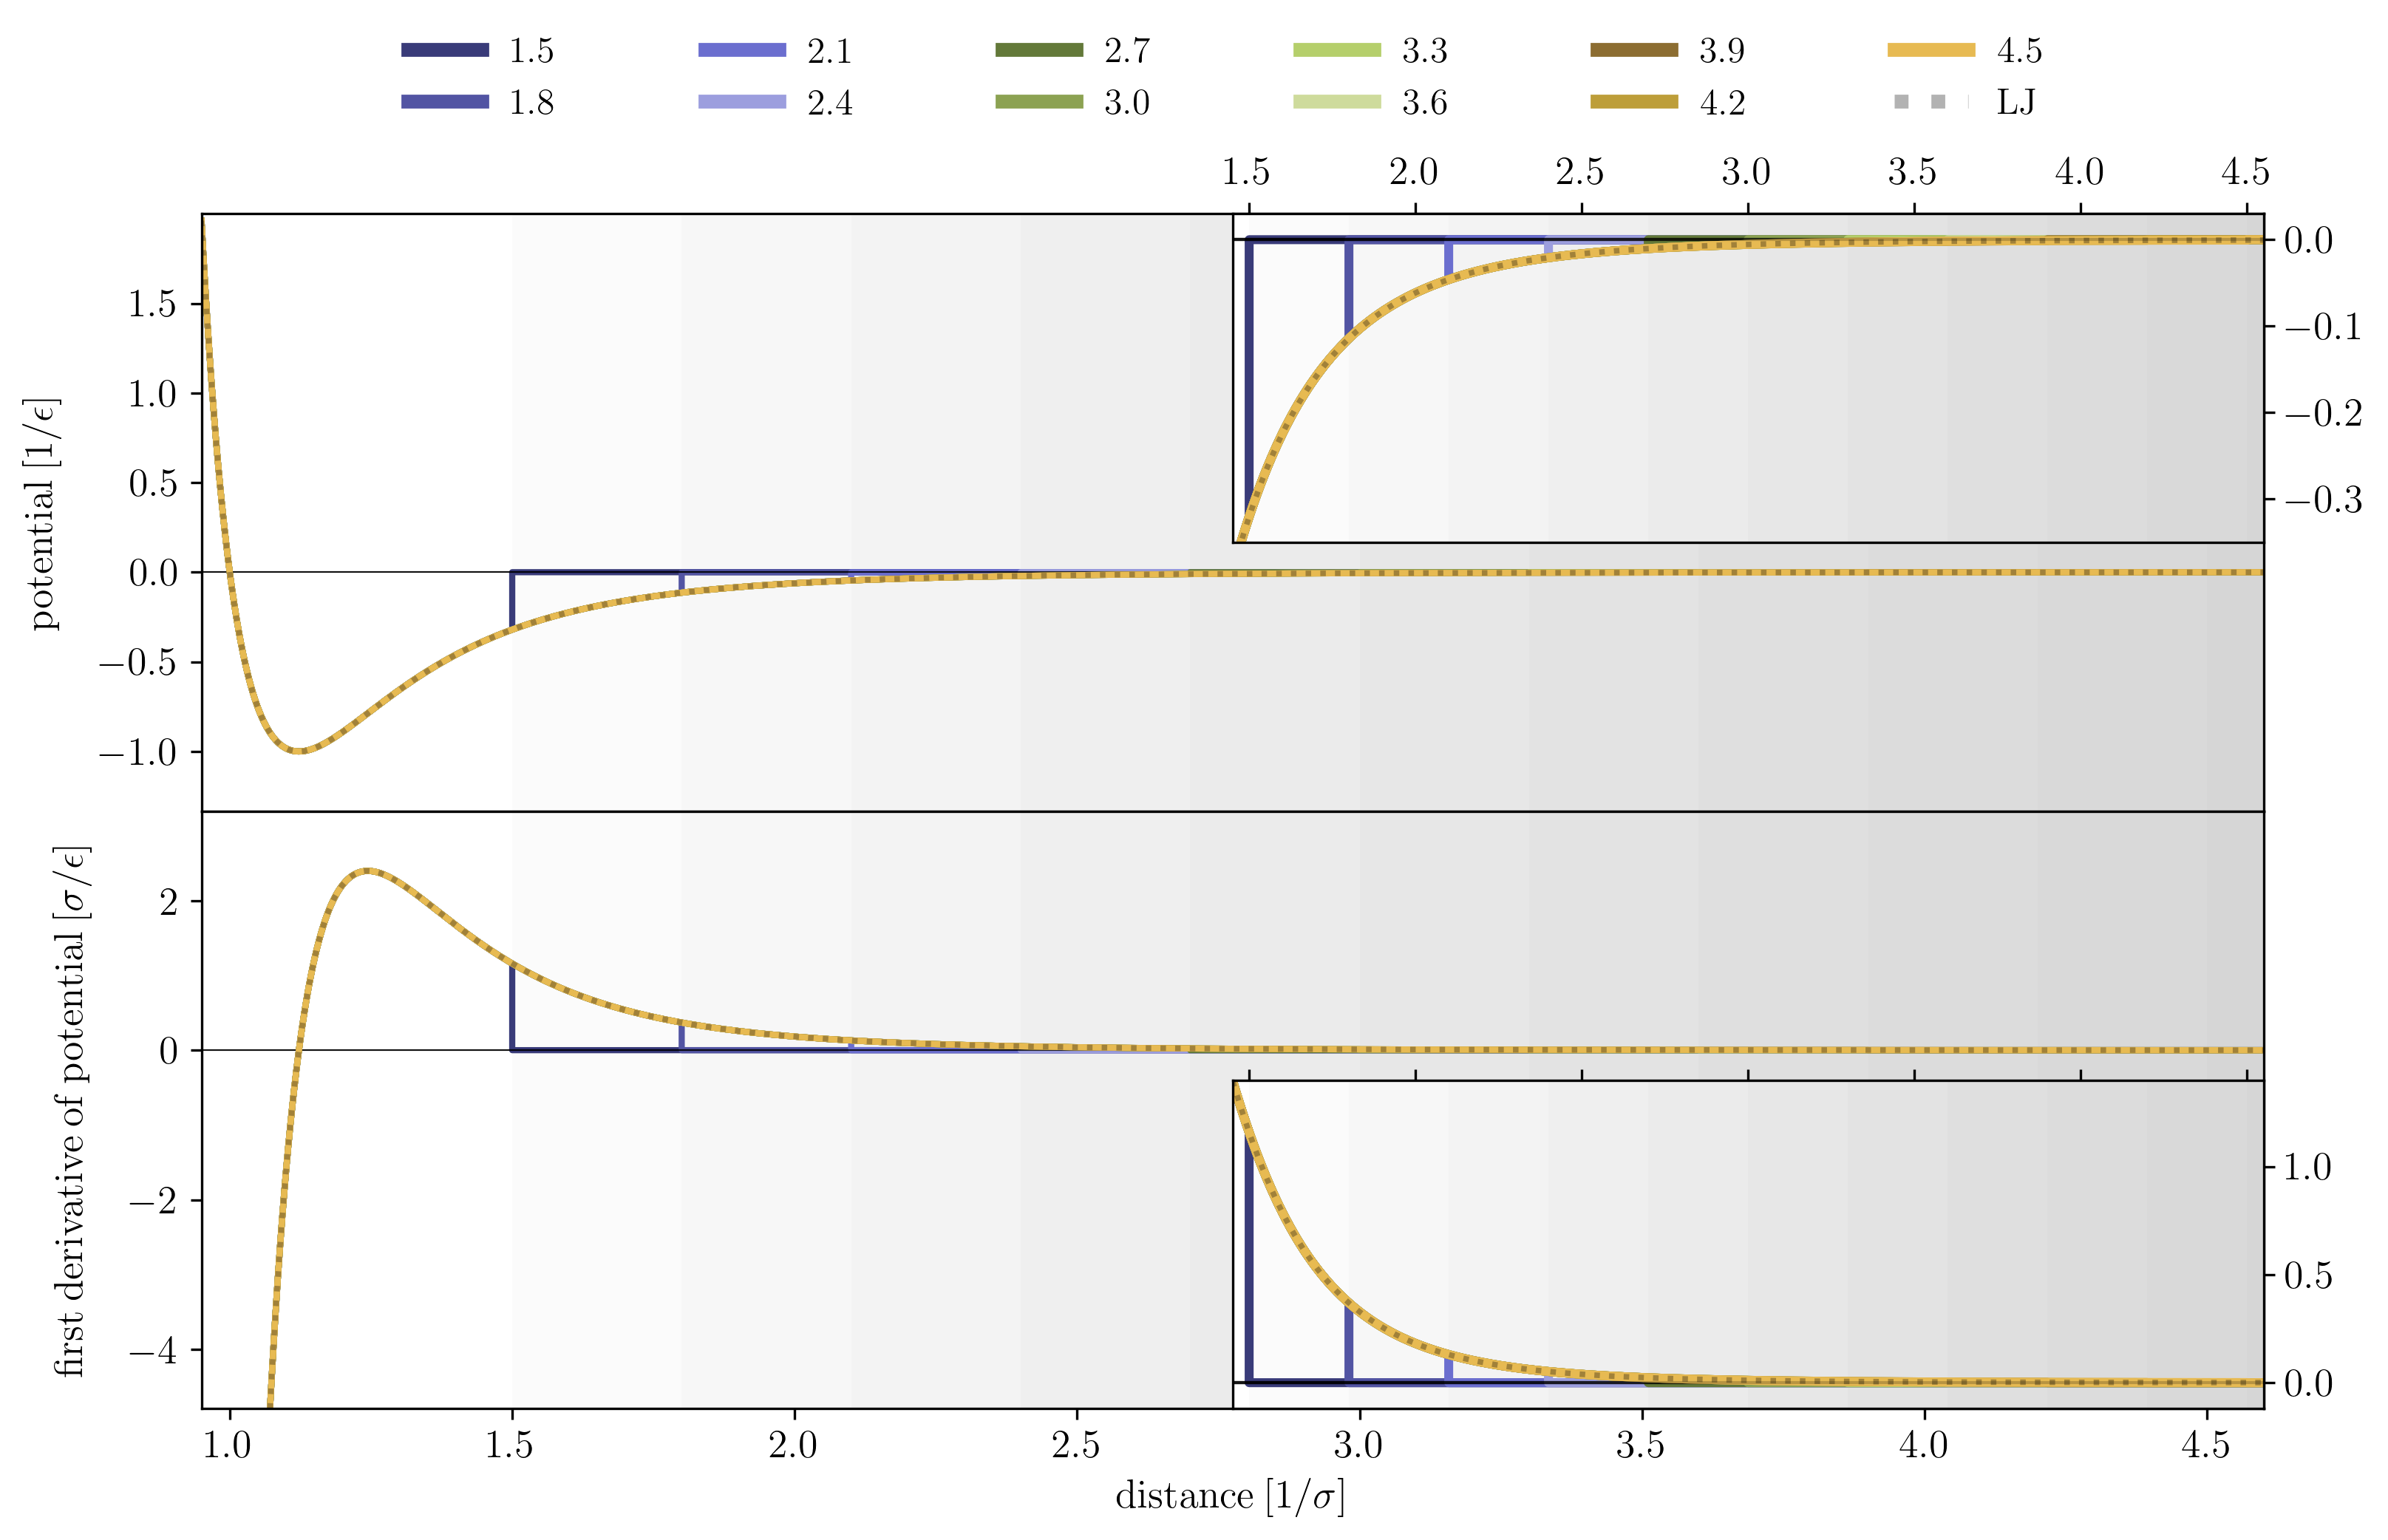

In [95]:
import os, copy
from simplemd_2.io import load_settings_from_json
import simplemd_2 as smd
from matplotlib import rc
import matplotlib.patches as mpatches
from simplemd_2.utils import format_to_tex, get_colorlist, add_points
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

folder_path = os.path.join(pth, folder)

small_ax = [None, None]
yfocus.append(np.sort(-np.array(yfocus[0])*4))
leg_labels = list()

colorlist = get_colorlist(20, start=col_start)
conf_counter = 0

plt.rcParams.update({"text.usetex": True, 'font.size': fontsize})

rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} \usepackage[utf8]{inputenc}' )

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

fig, big_ax = plt.subplots(2,1, sharex=True, gridspec_kw={'hspace':0}, dpi=dpi, figsize=figsize)

for i, aa in enumerate(big_ax):
    small_ax[i] = mpl_il.inset_axes(aa, width='50%', height='55%', loc=i*3+1, borderpad=0)
    small_ax[i].yaxis.tick_right()
    small_ax[i].xaxis.tick_top()
    small_ax[i].set_xlim(xfocus)
    small_ax[i].set_ylim(yfocus[i])
    aa.set_xlim(xlim)

for path, subdirs, files in os.walk(folder_path):
    var_loaded = False
    def_loaded = False
    print(path, files)    
    
    if var_name in files:
        var_settings = load_settings_from_json(os.path.join(path, var_name))
        var_loaded = True
        
    if def_name in files:
        def_settings = load_settings_from_json(os.path.join(path, def_name))
        def_loaded = True
    
    print(var_loaded, def_loaded)
    assert def_loaded is var_loaded, 'One of the settings files is missing from the folder {folder} or has different name than expected.'.format(folder=path)
    
    
    if all([def_loaded, var_loaded]):
        ##################
        
        for id1, (key1, item_list1) in enumerate(var_settings.items()):
            for id2, (key2, item_list2) in enumerate(var_settings.items()):
                if key1 == key2 or id2 < id1:
                    continue

                for item1 in item_list1:
                    for item2 in item_list2:
                        st = def_settings.copy()  

                        key1 = key1.strip("_")
                        key2 = key2.strip("_")

                        if type(item1) == dict:
                            st[key1].update(item1)
                            lab1 = key1 + "_" + list(item1.keys())[0]
                            val1 = list(item1.values())[0]

                        else:
                            st[key1] = item1
                            lab1 = key1
                            val1 = item1

                        if type(item2) == dict:
                            st[key2].update(item2)
                            lab2 = key2 + "_" + list(item2.keys())[0]
                            val2 = list(item2.values())[0]

                        else:
                            st[key2] = item2
                            lab2 = key2
                            val2 = item2
                            
                        item12 = [(lab1, val1), (lab2, val2)]
                        conf_counter += 1
                        
                        str_values = str(lab1)+"--"+str(val1)+"__"+str(lab2)+"--"+str(val2)
                        leg_name = str_values.replace(":","_")
                        
                        leg_labels.append((conf_counter, leg_name))
                        
                        if conf_counter in ignore_list:
                            continue
                                          
                        ###################
                        s = st
                        sc = s['cutoff']

                        if sc['use_cutoff'] is True:
                            potential = smd.Potential(sc['potential'])
                            cutoff = smd.Cutoff(sc['cutoff_distance'],
                                            smooth_length = sc['smoothing_length'],
                                            smooth_type = sc['cutoff_smoothing'],
                                            shift = sc['shift'],
                                            n = sc['n'],
                                            c = sc['c'])
                            interactions = smd.Interactions(potential, cutoff)

                        else:
                            from simplemd_2.utils import format_interaction_function
                            print("")
                            interactions = format_interaction_function(s['interactions'])
                        
                        
                        behind_cutoff = mpatches.Rectangle((sc['cutoff_distance'], -10), 5, 15, facecolor='gray', alpha=0.03)
                        
                        xdata = np.linspace(*xlim, 1000)
                        ydata = np.apply_along_axis(interactions.get_interaction, 0, xdata)  
                        
                        if sc['use_cutoff'] is True:
                            xdata, *ydata = add_points(sc['cutoff_distance'], potential, xdata, *ydata)                            

                        for i, aa in enumerate(big_ax):
                            aa.plot([xdata[0], xdata[-1]], [0]*2, color='k', linewidth=0.5, alpha=0.2)
                            small_ax[i].plot(xdata, ydata[i], color = colorlist[conf_counter-1], linewidth=2.9)
                            small_ax[i].plot([xdata[0], xdata[-1]], [0]*2, color='k', linewidth=1.0, alpha=0.2)
                            
                            small_ax[i].add_patch(copy.copy(behind_cutoff))
                            aa.add_patch(copy.copy(behind_cutoff))
                            
#                             aa.plot(xdata, ydata[i], label=format_to_tex(leg_name), linewidth= 2.0, color = colorlist[conf_counter-1])
                            aa.plot(xdata, ydata[i], label=format_to_tex(list(item2.values())[0]), linewidth= 2.0, color = colorlist[conf_counter-1])


                        big_ax[0].set_ylim(bottom= 4.0 / 3.0 * ydata[0].min(), top= - 2 *  ydata[0].min() )
                        big_ax[1].set_ylim(bottom= -2.0 * ydata[1].max(), top= 4/3 *  ydata[1].max())

                        small_ax[1].set_xticklabels([])

if include_LJ is True:
    LJ_pot = smd.Potential("Lennard_Jones")
    #LJ_int = smd.Interactions(LJ_pot, None)
    LJ_xdata = np.linspace(*xlim, 1000)
    LJ_ydata =  np.apply_along_axis(LJ_pot, 0, LJ_xdata)
    
    for ax_group in [big_ax, small_ax]:
        for i, axis in enumerate(ax_group):
            axis.plot(LJ_xdata, LJ_ydata[i], label=format_to_tex("LJ"), **LJ_kwargs)
            
            
# for ax_group in [big_ax, small_ax]:
#     for axis in ax_group:
#         axis.add_patch(copy.copy(behind_cutoff))
                
handles, labels = big_ax[0].get_legend_handles_labels()
newLabels, newHandles = list(), list()
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)         
        handle = copy.copy(handle)
        handle.set_linewidth(legend_linewidth)
        newHandles.append(handle)                       
                        
big_ax[0].legend(newHandles, newLabels,
                 frameon=False, loc="lower center", 
               ncol=6, borderaxespad=0.0, columnspacing=4,
               prop={'size': legend_font_size},
               bbox_transform=plt.gcf().transFigure,
               bbox_to_anchor=(0.51,0.93),
              )

labpad = 12.0
big_ax[1].set_xlabel(format_to_tex("distance ")+"$\\left[1/\sigma \\right]$")
big_ax[0].set_ylabel(format_to_tex("potential ")+"$\\left[1/\epsilon \\right]$", labelpad=labpad)
big_ax[1].set_ylabel(format_to_tex("first derivative of potential ")+"$\\left[\sigma/\epsilon \\right]$", labelpad=labpad)

print("\nCurrently active IGNORE LIST:\n", ignore_list)
print("\nLegend labels with indices:\n", leg_labels)

if type(savefig) == str:
    from simplemd_2.utils import file_saver
    save_path = file_saver(os.path.join(folder_path, savefig))
    plt.savefig(save_path, dpi=dpi, bbox_inches='tight')

plt.show()

## NY_series

[8.30520065 1.62558709 2.95751534] [[ 4.83304473 -0.69077966  0.26606639]
 [-0.69077966  0.12296423 -0.04863933]
 [ 0.26606639 -0.04863933  0.01934244]]
[8.40123724e+01 8.58571969e-03 5.87415710e+00] [[ 4.15622794e+00 -1.62191856e-02  1.22380307e+00]
 [-1.62191856e-02  1.31806512e-04 -1.02492362e-02]
 [ 1.22380307e+00 -1.02492362e-02  7.98826506e-01]]


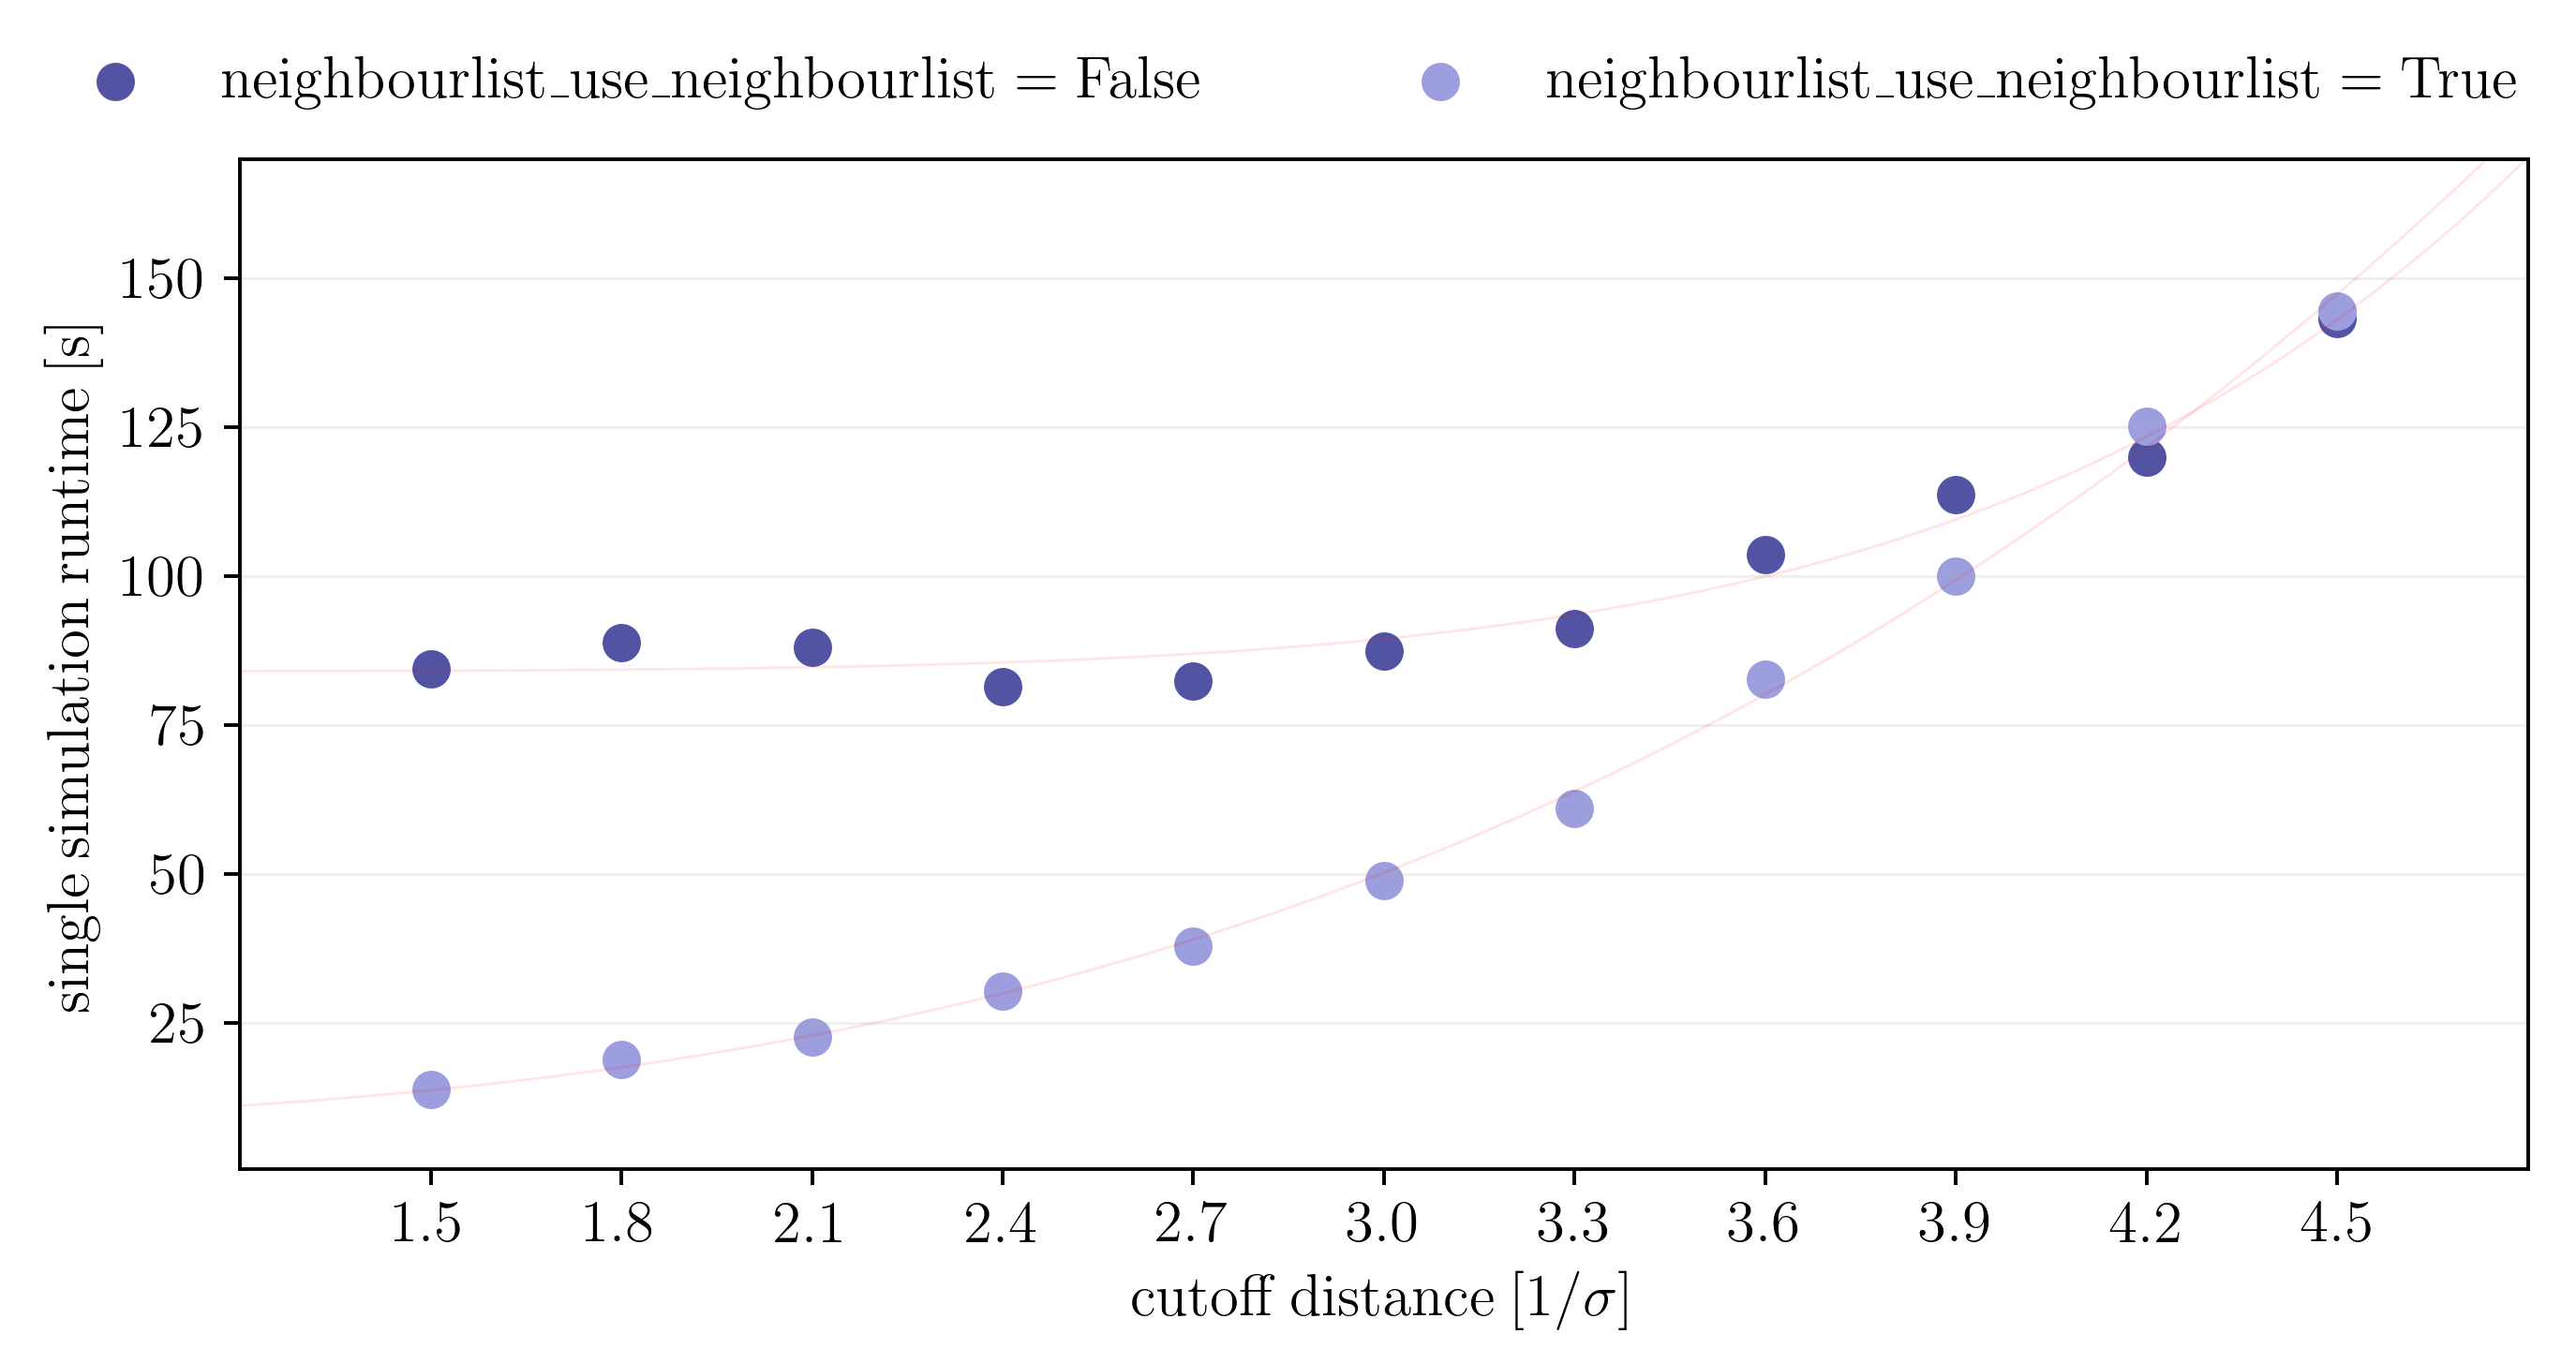

In [21]:
### NY_series ###

import os
path = 'C:/Users/Michal Ptáček/Desktop/images_md'
folder = 'NY_series'

folder = os.path.join(path,folder)

dpi=350
figsize=(9,4)
fontsize=13 
alpha=0.7
width=0.8

savefig=os.path.join(folder, "image_custom_times.png")
#savefig=None

yscale='linear'
switch=-1

import pandas as pd
import numpy as np
import os
from matplotlib.ticker import AutoMinorLocator 
import matplotlib.pyplot as plt
from matplotlib import rc
from simplemd_2.utils import format_to_tex, get_colorlist

filename="runtime_data.csv"
filepath = os.path.join(folder, filename)

imported_data = pd.read_csv(filepath, header=0, index_col=[0,1])

level_list = imported_data.index.levels
lengths = np.array([len(i) for i in level_list])
new_order = np.argsort(lengths)[::switch]
sorted_data = imported_data.sort_index(level=[new_order[1],])
data = sorted_data.reorder_levels(new_order[::-1]).sort_index()

data.rename(mapper= lambda x: str(x), axis=0, inplace=True, level=0)

level0_labels = data.index.levels[0]
level1_labels = data.index.levels[1]

level1_labels = data.index.levels[1]

colorlist = get_colorlist(9)

nn = len(level0_labels)
mm = len(level1_labels)

xticks = [i*(nn+1) + (nn+1)/2 for i in range(mm)]
xticks_lab = list()

#level1_labels = ["No cutoff","Cutoff-shift","Cutoff-polynom 
from scipy.optimize import curve_fit

plt.rcParams.update({"text.usetex": True, 'font.size': fontsize})
rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} \usepackage[utf8]{inputenc}' )

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

fig, ax = plt.subplots(num=None, figsize=figsize, dpi=dpi, facecolor='w', edgecolor='k')
plt.yscale(yscale)

for i, key in enumerate(level0_labels):
    dd = data.loc[str(key)]
    xticks_lab.append(format_to_tex("{name}={key}".format(name=level0_labels.name, key=key)))
    m = dd.index.size
    
    ydata = dd.to_numpy().mean(axis=1)
    posi = dd.index

    plt.scatter(y=ydata, x=posi, label=format_to_tex(key), color=colorlist[i], s=55)

###

def cubic_func(x, a, b, c):
    return a+b*x**c

new_x = np.linspace(min(posi)-0.5, max(posi)+0.5, 100)
pars1, stat1 = curve_fit(cubic_func,  posi, data.loc['True'].to_numpy().mean(axis=1))
print(pars1, stat1)
a, b, c = pars1
plt.plot(new_x, list(map(lambda x: cubic_func(x,a,b,c), new_x)), color='red', alpha=0.2, linewidth=0.6)

pars2, stat2 = curve_fit(cubic_func,  posi, data.loc['False'].to_numpy().mean(axis=1))
print(pars2, stat2)
a, b, c = pars2
plt.plot(new_x, list(map(lambda x: cubic_func(x,a,b,c), new_x)), color='red', alpha=0.2, linewidth=0.6)

### 

dax = posi[1]-posi[0]
ax.set_xlim(posi[0]-dax, posi[-1] +dax)
ax.set_ylim(top=170)
ax.set_xticks(data.index.levels[1])
# ax.set_xticklabels([format_to_tex(x) for x in level1_labels])

def format_legend_label(indexing):
    labels = ["{key}={value}".format(key=indexing.name, value=i) for i in indexing.values]
    return labels


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, 
          xticks_lab,
          frameon=False, loc="lower center", ncol=2, bbox_to_anchor=(0.48, 0.9), borderaxespad=0.0, 
          bbox_transform=plt.gcf().transFigure, columnspacing=3,
         )

ax.grid(True, which='major', axis='y', alpha=0.2, linewidth=0.6)
# ax.grid(True, which='minor', axis='x', alpha=0.1, linewidth=0.5)

ax.set_xlabel(format_to_tex("cutoff distance ")+"$\\left[1/\sigma\\right]$")
#ax.set_xlabel(format_to_tex(data.index.levels[1].name))
ax.set_ylabel(format_to_tex("single simulation runtime [s]"))

if type(savefig) == str:
    from simplemd_2.utils import file_saver
    path = file_saver(os.path.join(folder, savefig))
    plt.savefig(path, dpi=dpi, bbox_inches='tight')

plt.show()

## NW05

[  0.62696908   1.76475744   5.40545638  17.89745193  46.93729811
 124.91002183]
0 0.6269690752029419
1 1.7647574424743653
2 5.405456376075745
3 17.89745192527771
4 46.937298107147214
5 124.9100218296051


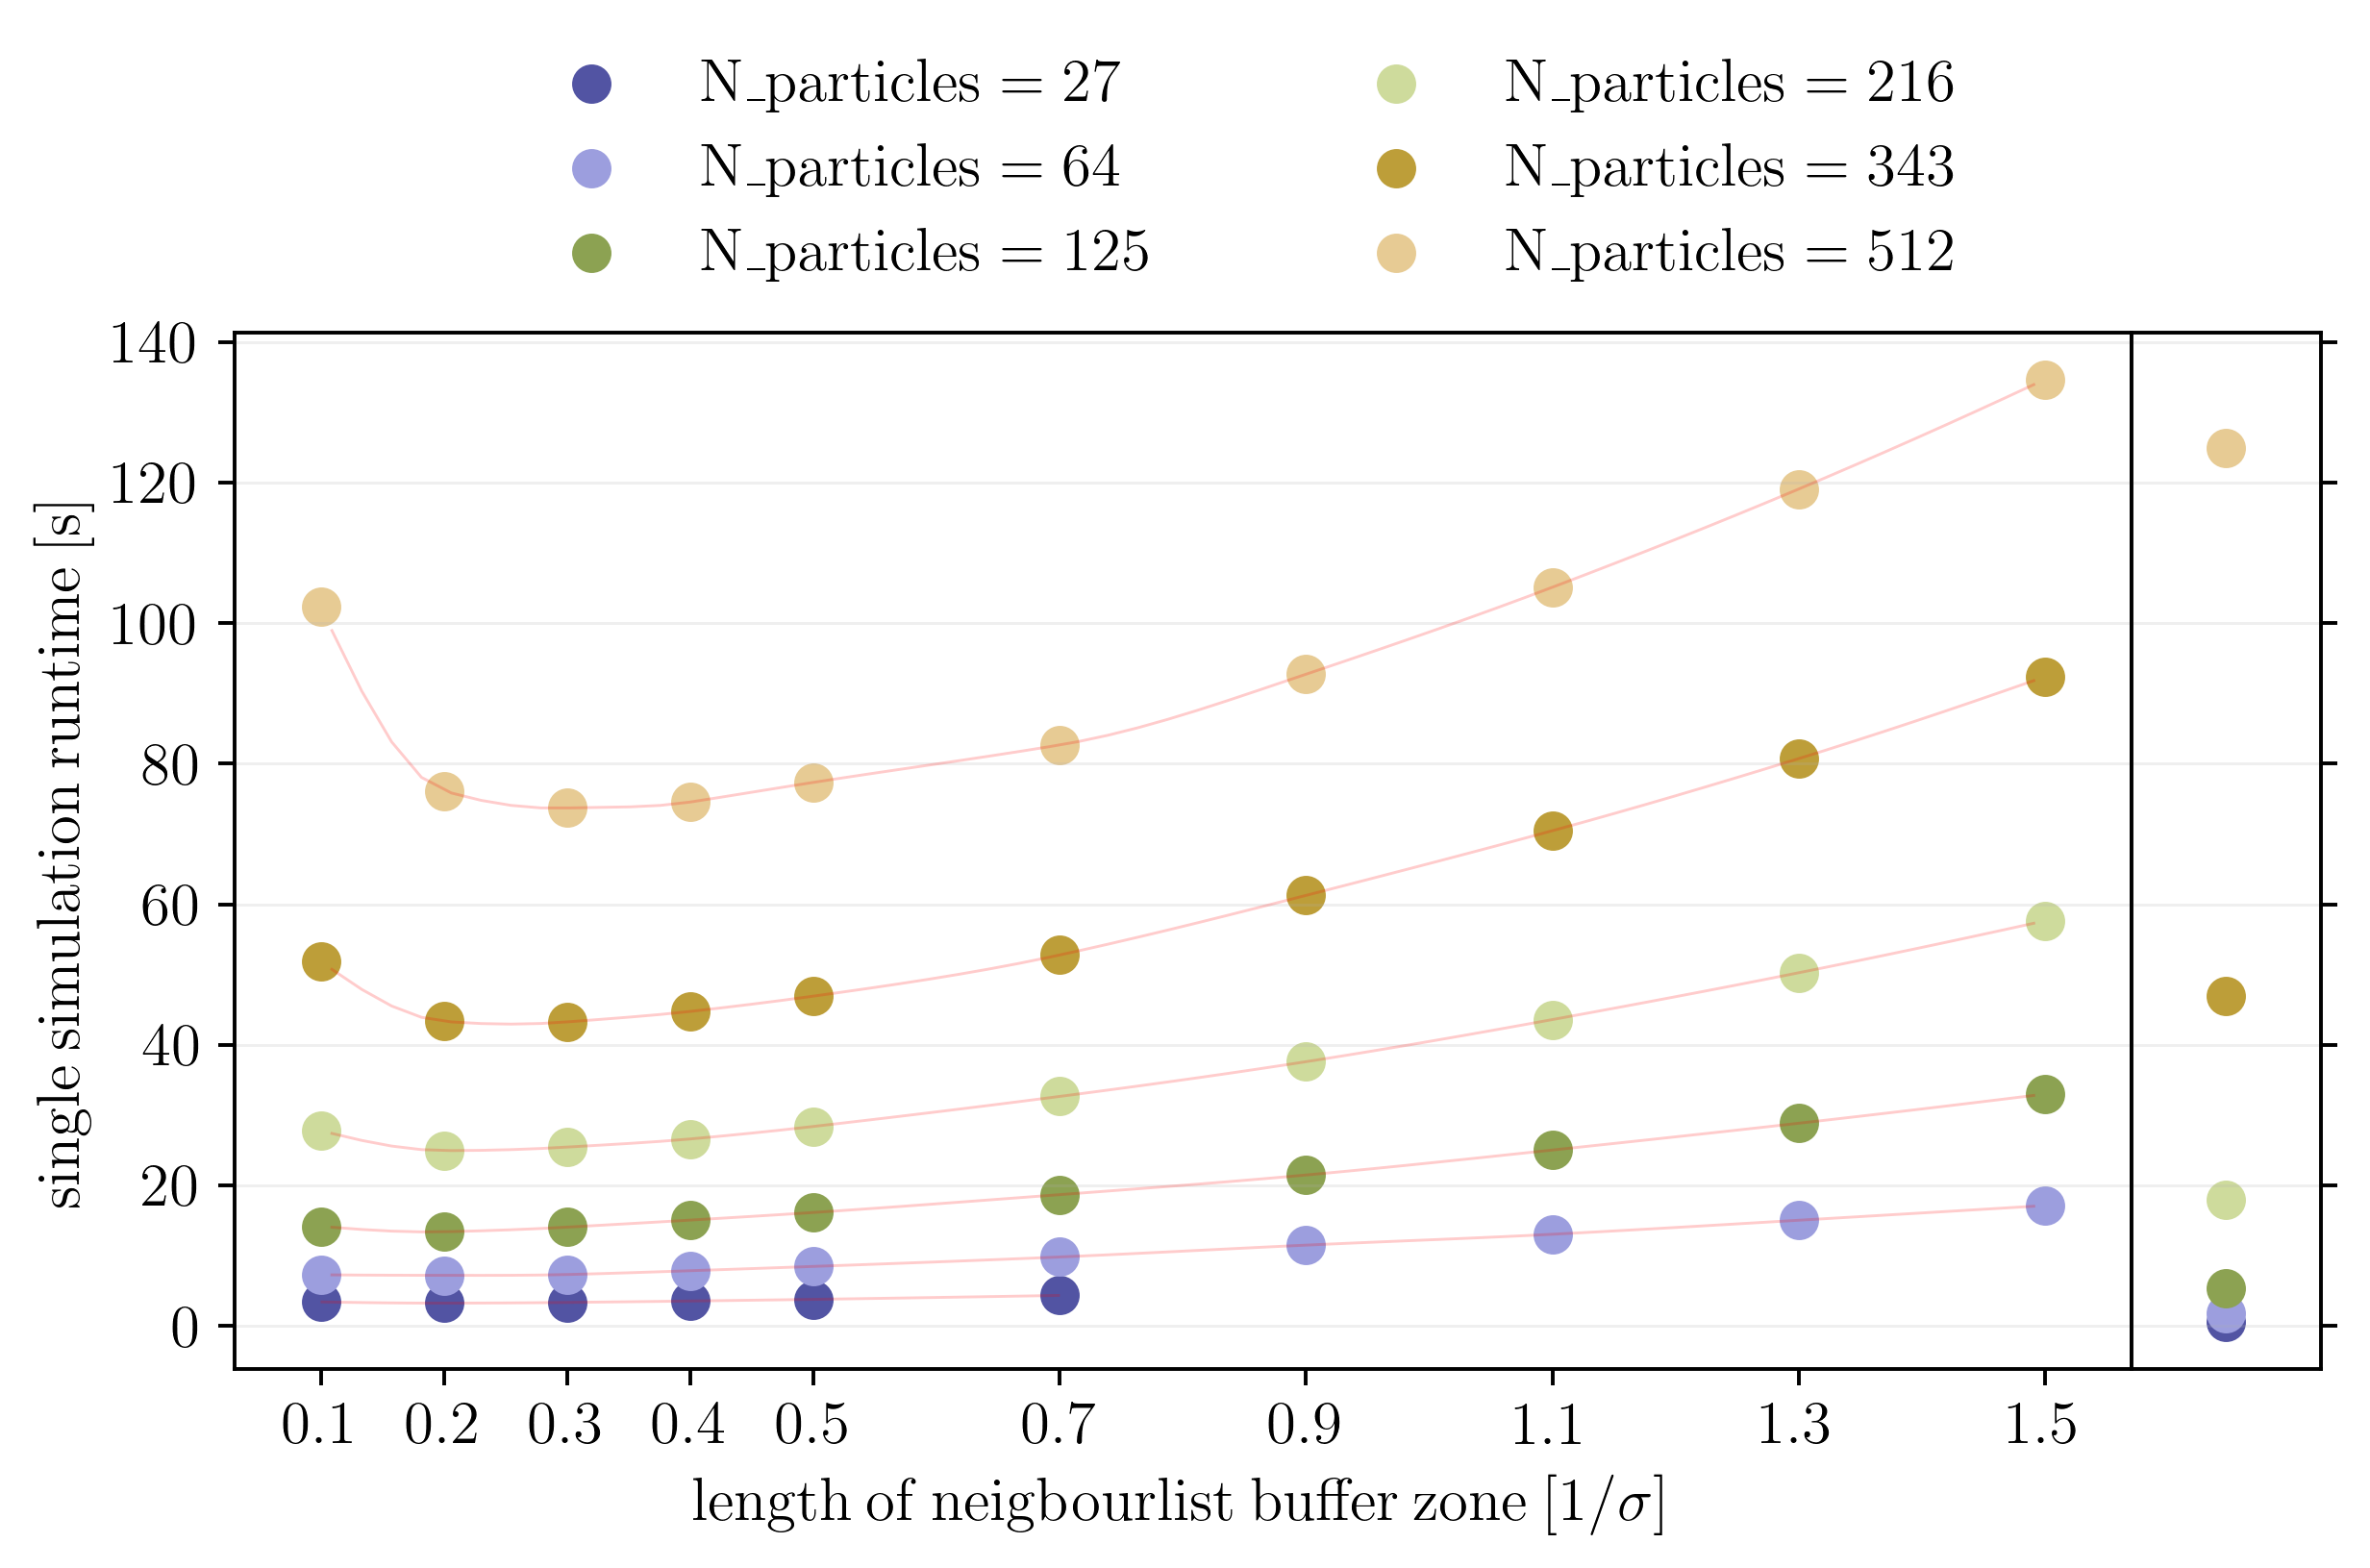

In [7]:
### NW_series ###

import os
path = 'C:/Users/Michal Ptáček/Desktop/images_md'
folder = 'NW_2_manegrot_series'

folder = os.path.join(path,folder)

filename2 = "NW05S/nw05.csv"

dpi=350
figsize=(8,4)
fontsize=13 
alpha=0.7
width=0.8

savefig=os.path.join(folder, "image_custom_times.png")
#savefig=None

yscale='linear'
switch=-1

import pandas as pd
import numpy as np
import os
from matplotlib.ticker import AutoMinorLocator 
import matplotlib.pyplot as plt
from matplotlib import rc
from simplemd_2.utils import format_to_tex, get_colorlist

filename="runtime_data.csv"
filepath = os.path.join(folder, filename)
filepath2 = os.path.join(folder, filename2)

imported_data = pd.read_csv(filepath, header=0, index_col=[0,1])
imported_data2 = pd.read_csv(filepath2, header=0, index_col=[0,1])

level_list = imported_data.index.levels
lengths = np.array([len(i) for i in level_list])
new_order = np.argsort(lengths)[::switch]
sorted_data = imported_data.sort_index(level=[new_order[1],])
data = sorted_data.reorder_levels(new_order[::-1]).sort_index()

level_list2 = imported_data2.index.levels
lengths2 = np.array([len(i) for i in level_list2])
new_order2 = np.argsort(lengths2)[::switch]
sorted_data2 = imported_data2.sort_index(level=[new_order2[1],])
data2 = sorted_data2.reorder_levels(new_order2[::-1]).sort_index()


level0_labels = data.index.levels[0]
level1_labels = data.index.levels[1]

level1_labels = data.index.levels[1]

colorlist = get_colorlist(9)

nn = len(level0_labels)
mm = len(level1_labels)

xticks = [i*(nn+1) + (nn+1)/2 for i in range(mm)]
xticks_lab = list()

#level1_labels = ["No cutoff","Cutoff-shift","Cutoff-polynom 
from scipy.interpolate import Akima1DInterpolator
from scipy.interpolate import interp1d

plt.rcParams.update({"text.usetex": True, 'font.size': fontsize})
rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} \usepackage[utf8]{inputenc}' )

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False


fig, (ax1, ax2) = plt.subplots(1,2, figsize=figsize, dpi=dpi, facecolor='w', edgecolor='k', sharey=True, gridspec_kw={'wspace':0, 'width_ratios':(10,1)}, )
plt.yscale(yscale)

for i, key in enumerate(level0_labels):
    dd = data.loc[key]
    xticks_lab.append(format_to_tex("{name}={key}".format(name=level0_labels.name, key=key)))
    m = dd.index.size
    
    ydata = dd.to_numpy().mean(axis=1)
    posi = dd.index
    
    f = Akima1DInterpolator(posi, dd.to_numpy().mean(axis=1))
    new_x = np.linspace(min(posi)-0.5, max(posi)+0.5, 100)
    ax1.plot(new_x, f(new_x), color='red', alpha=0.2, linewidth=0.6)
    
    ax1.scatter(y=ydata, x=posi, label=format_to_tex(key), color=colorlist[i], s=55)

#ax.set_xlim(0, mm*(nn+1))
ax1.set_xticks(data.index.levels[1])
# ax.set_xticklabels([format_to_tex(x) for x in level1_labels])

def format_legend_label(indexing):
    labels = ["{key}={value}".format(key=indexing.name, value=i) for i in indexing.values]
    return labels


handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, 
          xticks_lab,
          frameon=False, loc="lower center", ncol=2, bbox_to_anchor=(0.5, 0.9), borderaxespad=0.0, 
          bbox_transform=plt.gcf().transFigure, columnspacing=3,
         )

ax1.grid(True, which='major', axis='y', alpha=0.2, linewidth=0.6)
# ax.grid(True, which='minor', axis='x', alpha=0.1, linewidth=0.5)

ax1.set_xlabel(format_to_tex("length of neigbourlist buffer zone ")+"$\\left[1/\sigma\\right]$")
ax1.set_ylabel(format_to_tex("single simulation runtime [s]"))

ax2.yaxis.tick_right()
ax2.set_xticklabels([])
ax2.grid(True, which='major', axis='y', alpha=0.2, linewidth=0.6)
ax2.xaxis.set_visible(False)

ydata2 = data2.to_numpy().mean(axis=1)
print(ydata2)
for k in range(len(ydata2)):
    print(k, ydata2[k])
    ax2.scatter(y=ydata2[k], x=1, color=colorlist[k], s=55)

if type(savefig) == str:
    from simplemd_2.utils import file_saver
    path = file_saver(os.path.join(folder, savefig))
    plt.savefig(path, dpi=dpi, bbox_inches='tight')

plt.show()

## G series

[  0.62696908   1.76475744   5.40545638  17.89745193  46.93729811
 124.91002183]
0 0.6269690752029419
1 1.7647574424743653
2 5.405456376075745
3 17.89745192527771
4 46.937298107147214
5 124.9100218296051


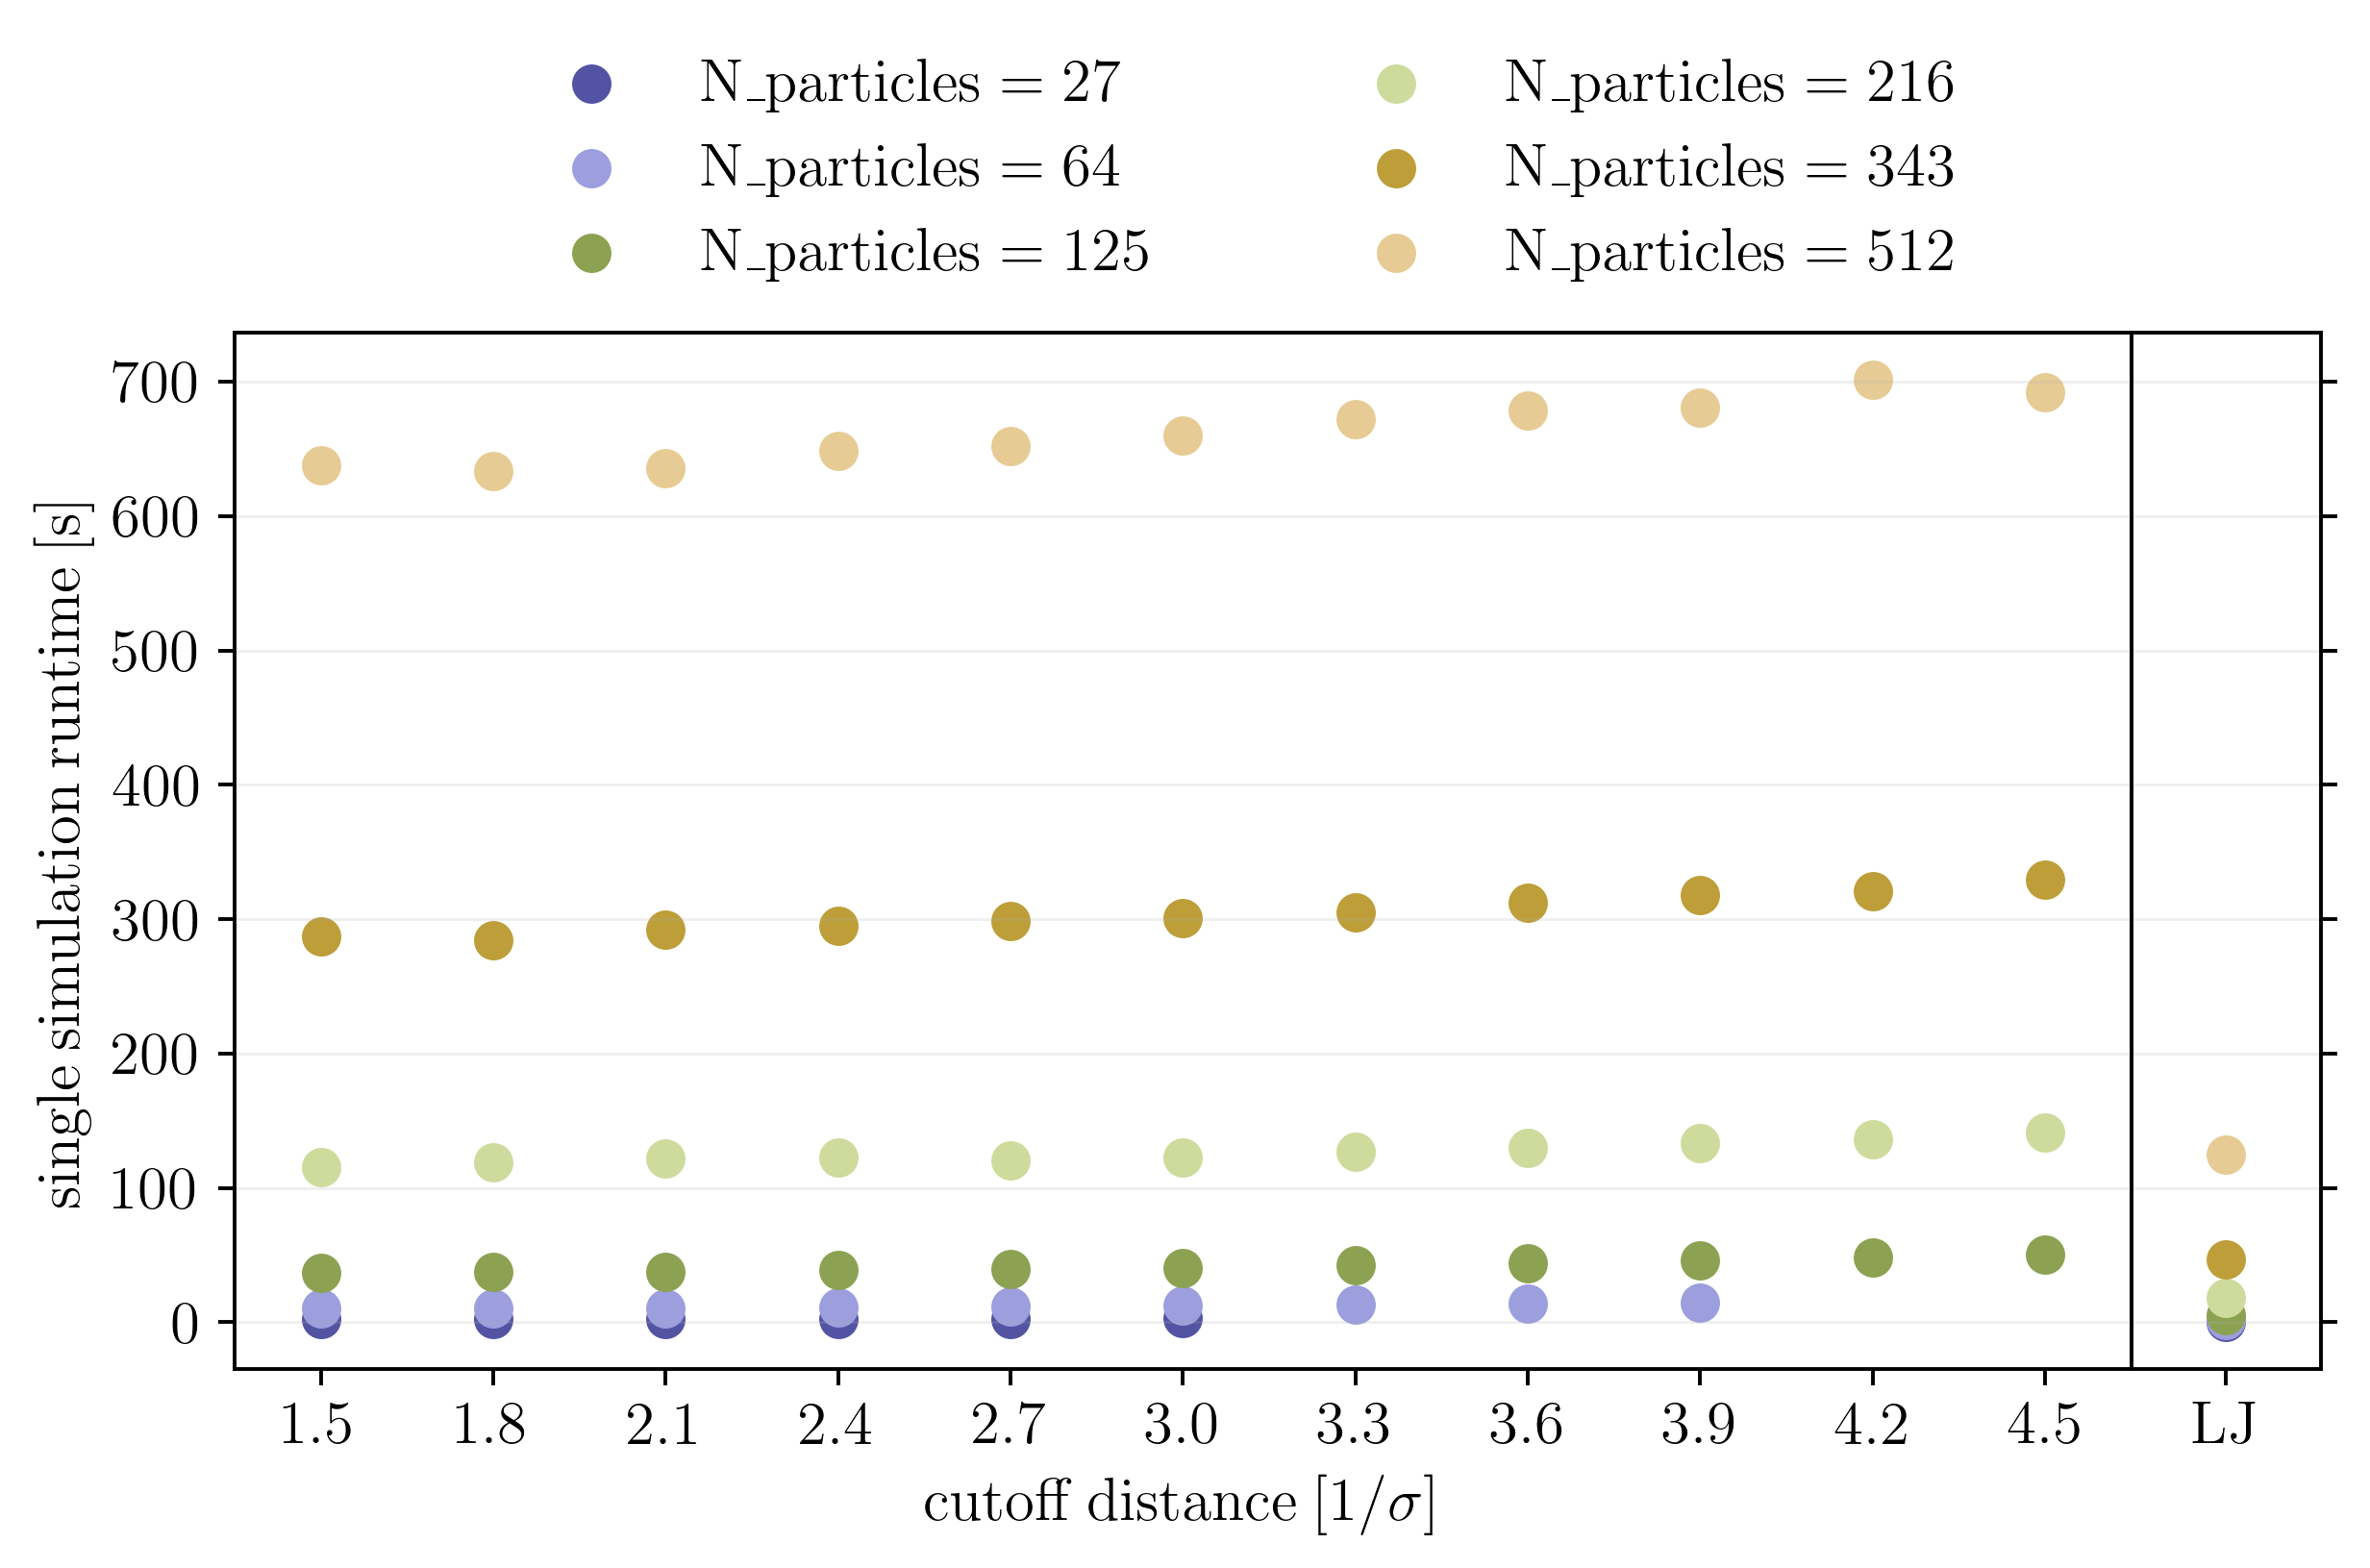

In [11]:
### NW_series ###

import os
path = 'C:/Users/Michal Ptáček/Desktop/images_md'
folder = 'G_series/G'
#folder = 'G_series/NG'

folder = os.path.join(path,folder)
filename="runtime_data.csv"
filename2 = "G00/runtime_data.csv"

dpi=350
figsize=(8,4)
fontsize=13 
alpha=0.7
width=0.8

savefig=os.path.join(folder, "image_custom_times.png")
#savefig=None

yscale='linear'
switch=-1

import pandas as pd
import numpy as np
import os
from matplotlib.ticker import AutoMinorLocator 
import matplotlib.pyplot as plt
from matplotlib import rc
from simplemd_2.utils import format_to_tex, get_colorlist

filepath = os.path.join(folder, filename)
filepath2 = os.path.join(folder, filename2)

imported_data = pd.read_csv(filepath, header=0, index_col=[0,1])
imported_data2 = pd.read_csv(filepath2, header=0, index_col=[0,1])

level_list = imported_data.index.levels
lengths = np.array([len(i) for i in level_list])
new_order = np.argsort(lengths)[::switch]
sorted_data = imported_data.sort_index(level=[new_order[1],])
data = sorted_data.reorder_levels(new_order[::-1]).sort_index()

level_list2 = imported_data2.index.levels
lengths2 = np.array([len(i) for i in level_list2])
new_order2 = np.argsort(lengths2)[::switch]
sorted_data2 = imported_data2.sort_index(level=[new_order2[1],])
data2 = sorted_data2.reorder_levels(new_order2[::-1]).sort_index()


level0_labels = data.index.levels[0]
level1_labels = data.index.levels[1]

level1_labels = data.index.levels[1]

colorlist = get_colorlist(9)

nn = len(level0_labels)
mm = len(level1_labels)

xticks = [i*(nn+1) + (nn+1)/2 for i in range(mm)]
xticks_lab = list()

#level1_labels = ["No cutoff","Cutoff-shift","Cutoff-polynom 
from scipy.interpolate import Akima1DInterpolator
from scipy.interpolate import interp1d

plt.rcParams.update({"text.usetex": True, 'font.size': fontsize})
rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} \usepackage[utf8]{inputenc}' )

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False


fig, (ax1, ax2) = plt.subplots(1,2, figsize=figsize, dpi=dpi, facecolor='w', edgecolor='k', sharey=True, gridspec_kw={'wspace':0, 'width_ratios':(10,1)}, )
plt.yscale(yscale)

for i, key in enumerate(level0_labels):
    dd = data.loc[key]
    xticks_lab.append(format_to_tex("{name}={key}".format(name=level0_labels.name, key=key)))
    m = dd.index.size
    
    ydata = dd.to_numpy().mean(axis=1)
    posi = dd.index
    
    #f = Akima1DInterpolator(posi, dd.to_numpy().mean(axis=1))
    #new_x = np.linspace(min(posi)-0.5, max(posi)+0.5, 100)
    #ax1.plot(new_x, f(new_x), color='red', alpha=0.2, linewidth=0.6)
    
    ax1.scatter(y=ydata, x=posi, label=format_to_tex(key), color=colorlist[i], s=55)

#ax.set_xlim(0, mm*(nn+1))
ax1.set_xticks(data.index.levels[1])
# ax.set_xticklabels([format_to_tex(x) for x in level1_labels])

def format_legend_label(indexing):
    labels = ["{key}={value}".format(key=indexing.name, value=i) for i in indexing.values]
    return labels


handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, 
          xticks_lab,
          frameon=False, loc="lower center", ncol=2, bbox_to_anchor=(0.5, 0.9), borderaxespad=0.0, 
          bbox_transform=plt.gcf().transFigure, columnspacing=3,
         )

ax1.grid(True, which='major', axis='y', alpha=0.2, linewidth=0.6)
# ax.grid(True, which='minor', axis='x', alpha=0.1, linewidth=0.5)

ax1.set_xlabel(format_to_tex("cutoff distance ")+"$\\left[1/\sigma\\right]$")
ax1.set_ylabel(format_to_tex("single simulation runtime [s]"))

ax2.yaxis.tick_right()
ax2.set_xticks([0,1,2])
ax2.set_xticklabels(['',format_to_tex('LJ'),''])
ax2.grid(True, which='major', axis='y', alpha=0.2, linewidth=0.6)
ax2.xaxis.set_visible(True)

ydata2 = data2.to_numpy().mean(axis=1)
print(ydata2)
for k in range(len(ydata2)):
    print(k, ydata2[k])
    ax2.scatter(y=ydata2[k], x=1, color=colorlist[k], s=55)

if type(savefig) == str:
    from simplemd_2.utils import file_saver
    path = file_saver(os.path.join(folder, savefig))
    plt.savefig(path, dpi=dpi, bbox_inches='tight')

plt.show()

## TH_series

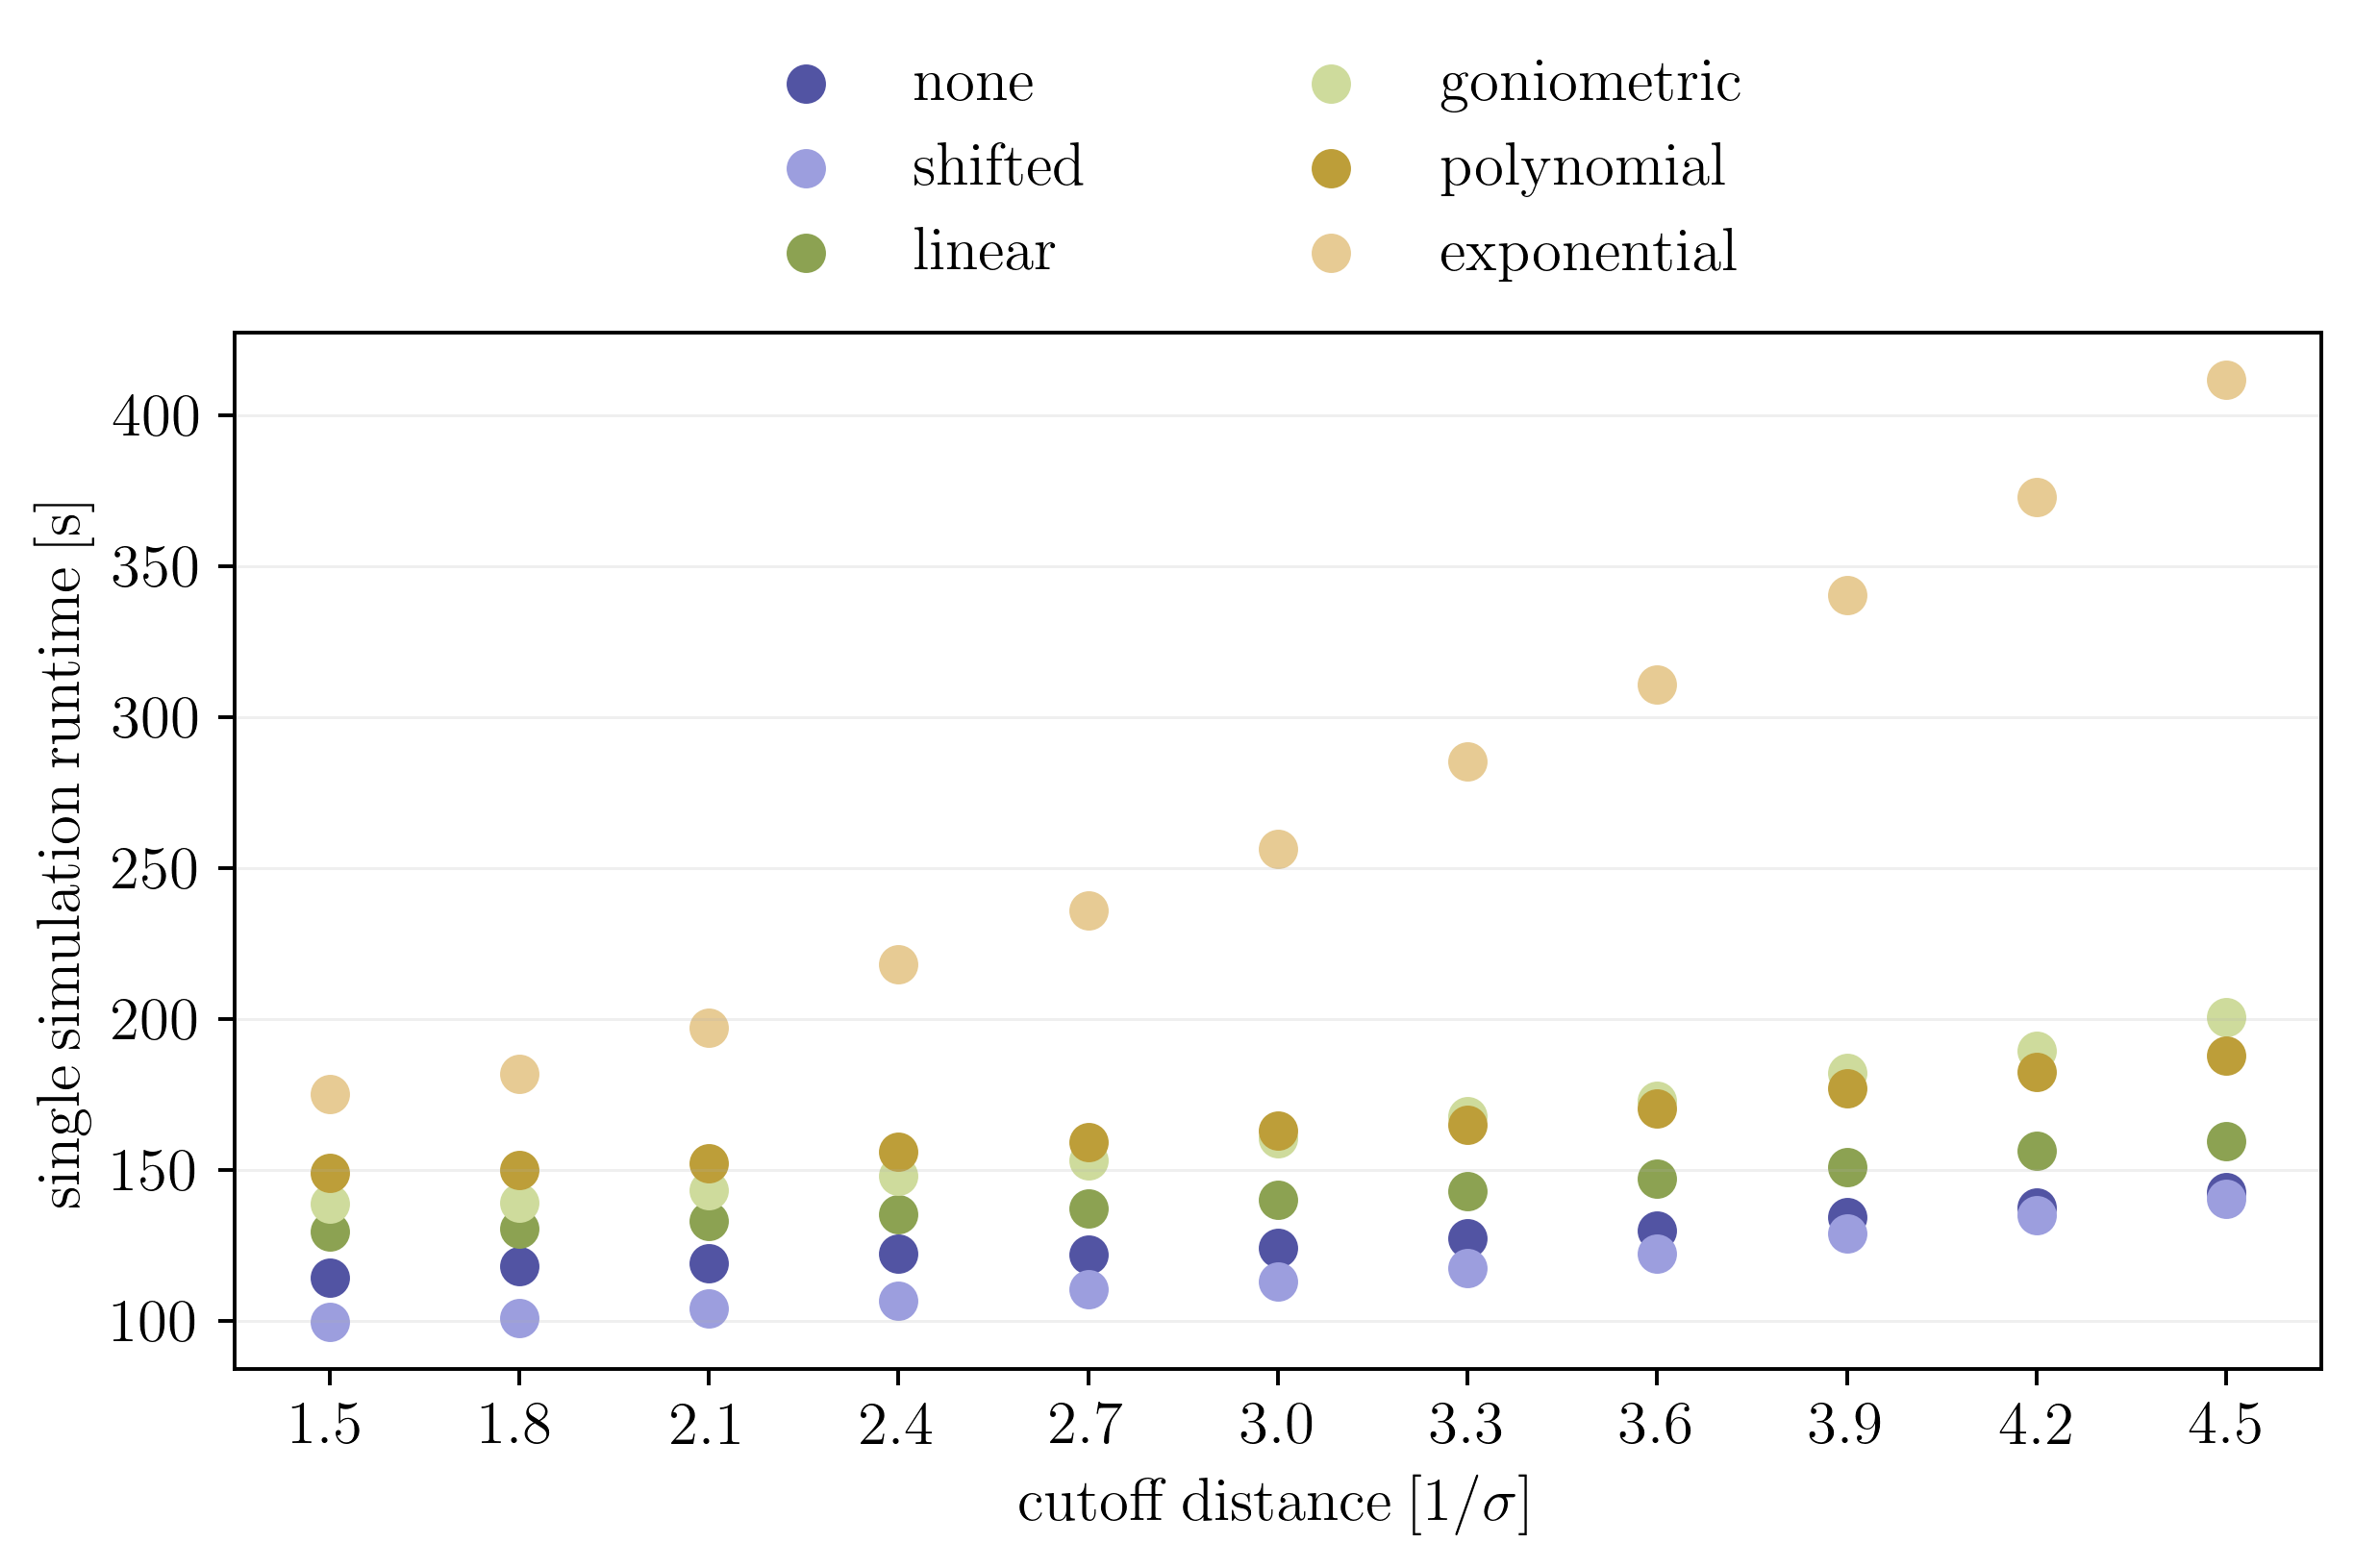

In [21]:
### TH_series ###

import os
path = 'C:/Users/Michal Ptáček/Desktop/images_md'
folder = 'TH_series/T2'

folder = os.path.join(path,folder)

dpi=350
figsize=(8,4)
fontsize=13 
alpha=0.7
width=0.8

savefig=os.path.join(folder, "image_custom_times.png")
#savefig=None

yscale='linear'
switch=-1

import pandas as pd
import numpy as np
import os
from matplotlib.ticker import AutoMinorLocator 
import matplotlib.pyplot as plt
from matplotlib import rc
from simplemd_2.utils import format_to_tex, get_colorlist

filename="runtime_data.csv"
filepath = os.path.join(folder, filename)

imported_data = pd.read_csv(filepath, header=0, index_col=[0,1])

level_list = imported_data.index.levels
lengths = np.array([len(i) for i in level_list])
new_order = np.argsort(lengths)[::switch]
sorted_data = imported_data.sort_index(level=[new_order[1],])
data = sorted_data.reorder_levels(new_order[::-1]).sort_index()

level0_labels = data.index.levels[0][[3,5,2,1,4,0]]
level1_labels = data.index.levels[1]

colorlist = get_colorlist(9)

nn = len(level0_labels)
mm = len(level1_labels)

xticks = [i*(nn+1) + (nn+1)/2 for i in range(mm)]
xticks_lab = list()

plt.rcParams.update({"text.usetex": True, 'font.size': fontsize})
rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} \usepackage[utf8]{inputenc}' )

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

fig, ax = plt.subplots(num=None, figsize=figsize, dpi=dpi, facecolor='w', edgecolor='k')
plt.yscale(yscale)

for i, key in enumerate(level0_labels):
    dd = data.loc[key]
    xticks_lab.append(format_to_tex("{key}".format(name=level0_labels.name, key=key)))
    m = dd.index.size
    
    ydata = dd.to_numpy().mean(axis=1)
    posi = dd.index

    plt.scatter(y=ydata, x=posi, label=format_to_tex(key), color=colorlist[i], s=55)

ax.set_xticks(data.index.levels[1])

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, 
          xticks_lab,
          frameon=False, loc="lower center", ncol=2, bbox_to_anchor=(0.5, 0.9), borderaxespad=0.0, 
          bbox_transform=plt.gcf().transFigure, columnspacing=3,
         )

ax.grid(True, which='major', axis='y', alpha=0.2, linewidth=0.6)

ax.set_xlabel(format_to_tex("cutoff distance ")+"$\\left[1/\sigma\\right]$")
ax.set_ylabel(format_to_tex("single simulation runtime [s]"))

if type(savefig) == str:
    from simplemd_2.utils import file_saver
    path = file_saver(os.path.join(folder, savefig))
    plt.savefig(path, dpi=dpi, bbox_inches='tight')

plt.show()

In [16]:
level0_labels[[3,5,2,1,4,0]]

Index(['none', 'shifted', 'linear', 'goniometric', 'polynomial',
       'exponential'],
      dtype='object', name='cutoff_cutoff_smoothing')

## J_series

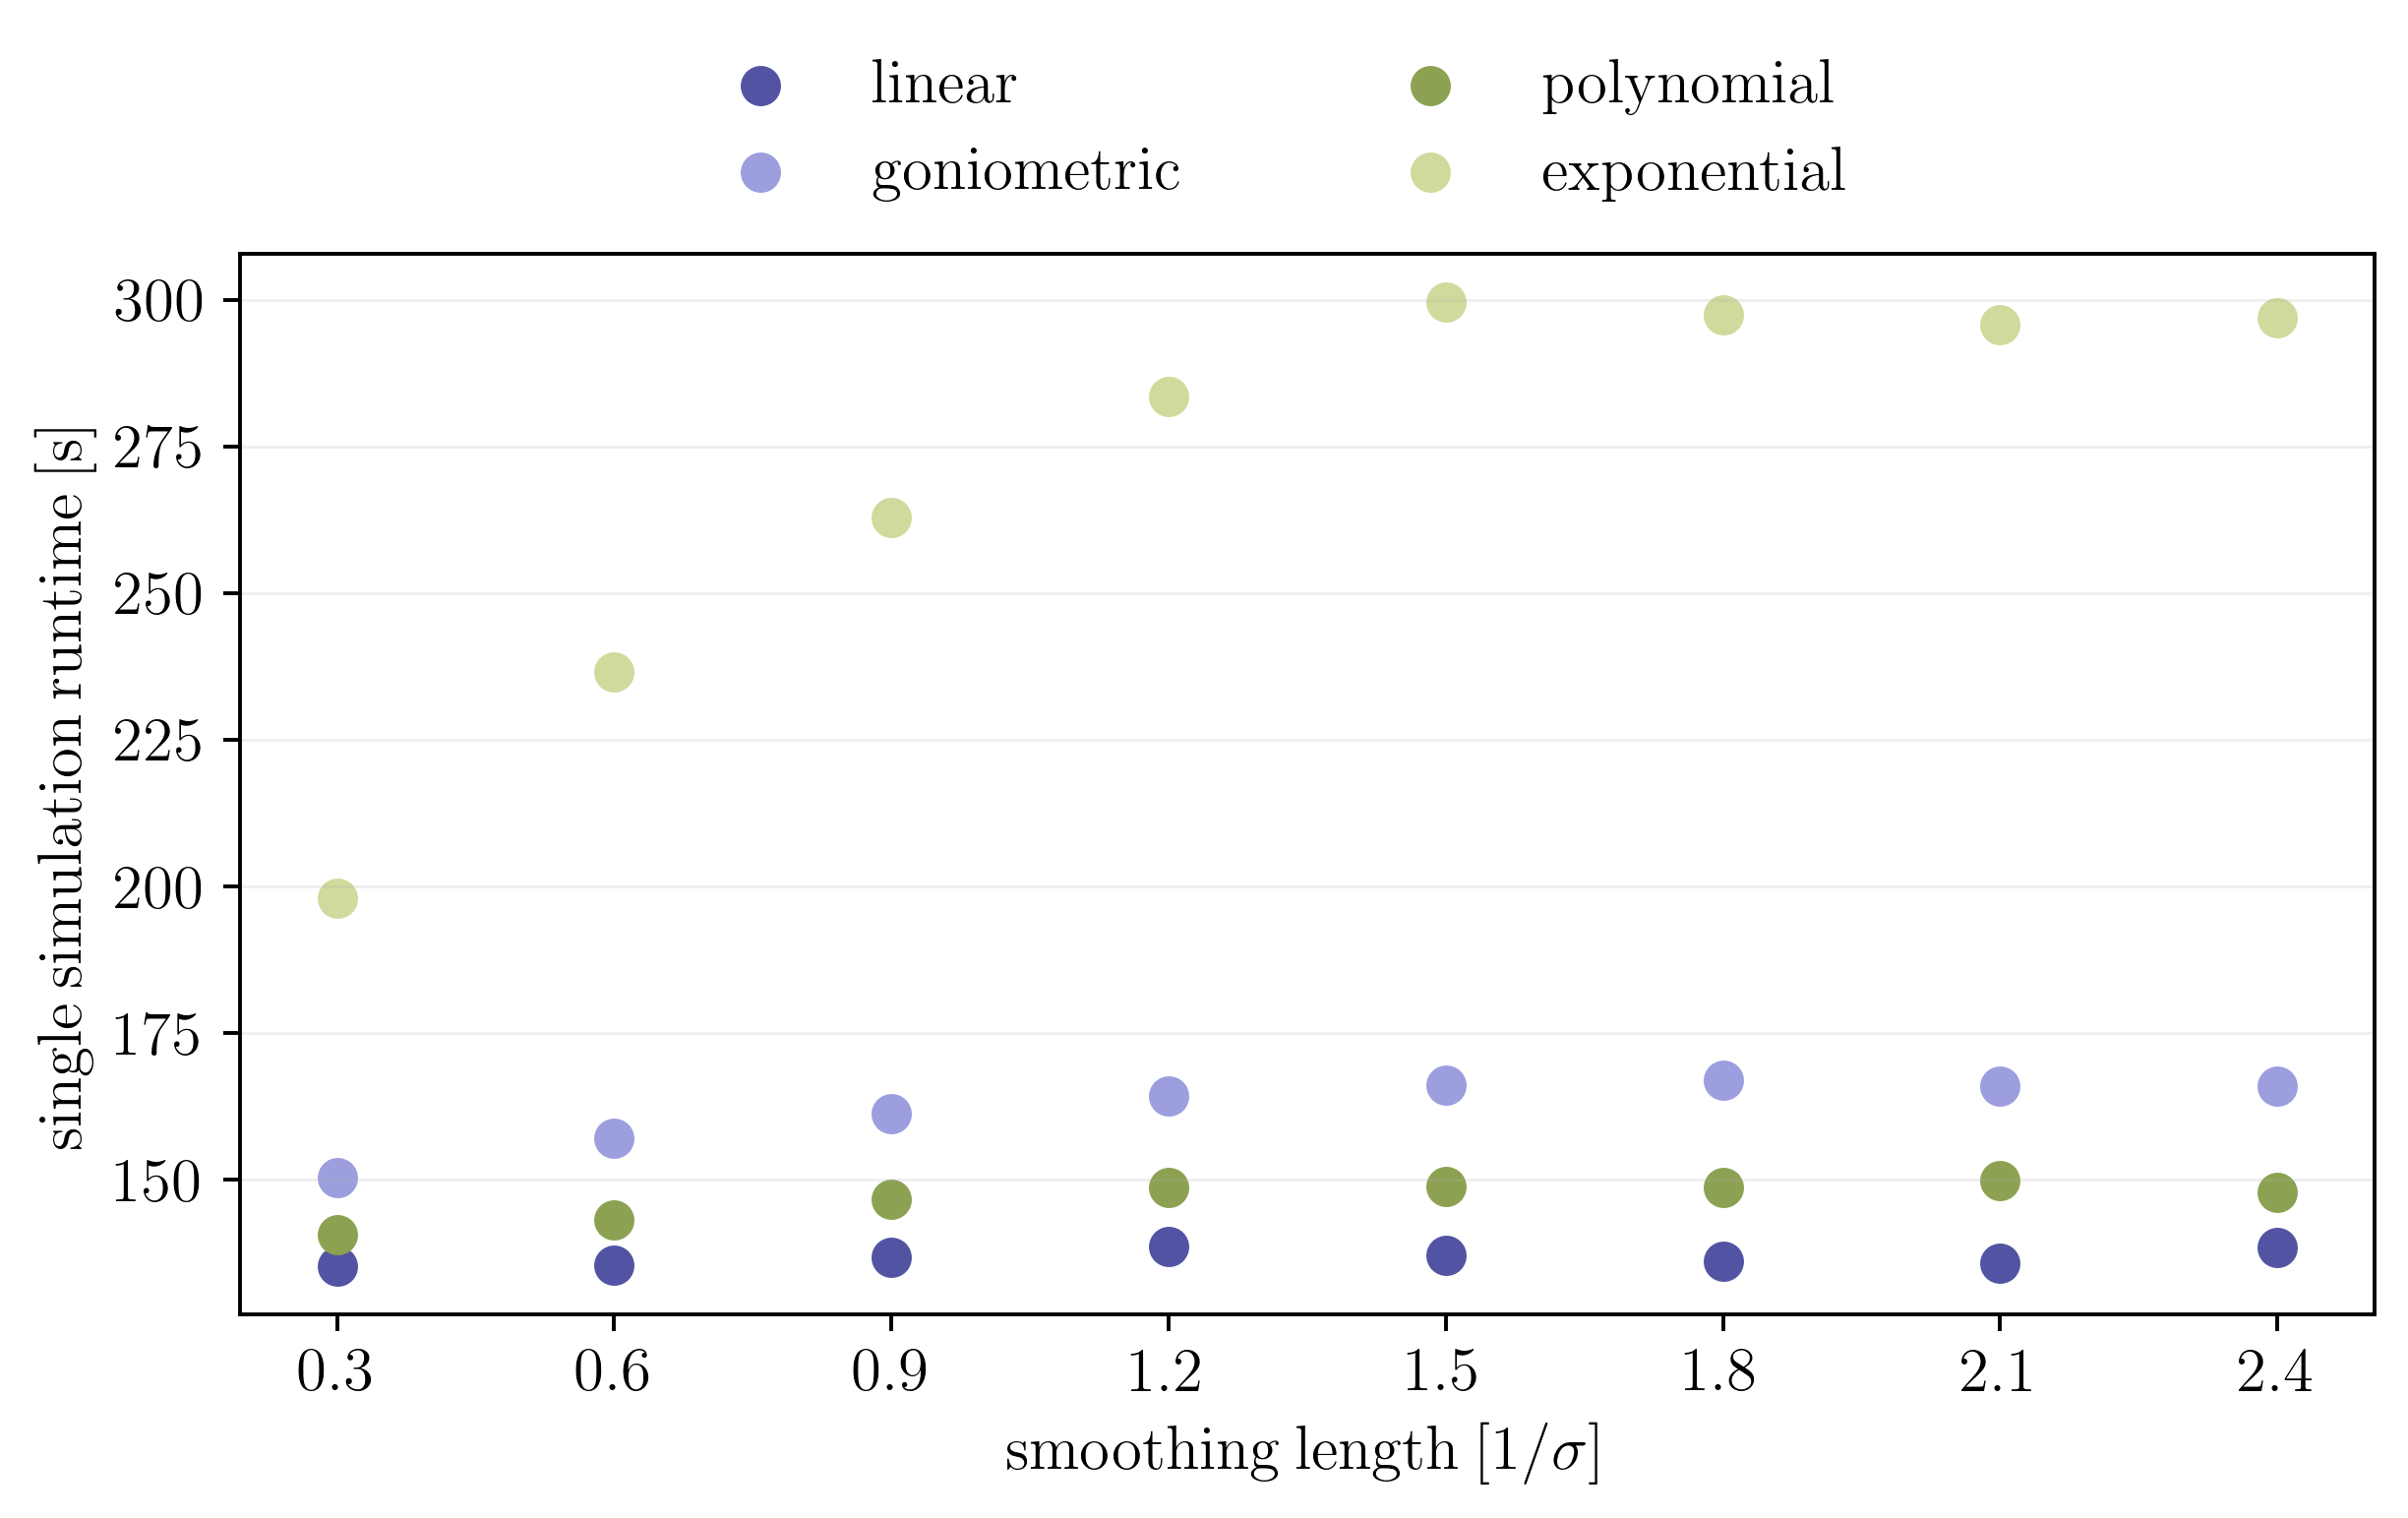

In [139]:
### TH_series ###

import os
path = 'C:/Users/Michal Ptáček/Desktop/images_md'
folder = 'J_series'

folder = os.path.join(path,folder)

dpi=350
figsize=(8,4)
fontsize=13 
alpha=0.7
width=0.8

savefig=os.path.join(folder, "image_custom_times.png")
#savefig=None

yscale='linear'
switch=-1

import pandas as pd
import numpy as np
import os
from matplotlib.ticker import AutoMinorLocator 
import matplotlib.pyplot as plt
from matplotlib import rc
from simplemd_2.utils import format_to_tex, get_colorlist

filename="runtime_data.csv"
filepath = os.path.join(folder, filename)

imported_data = pd.read_csv(filepath, header=0, index_col=[0,1])

level_list = imported_data.index.levels
lengths = np.array([len(i) for i in level_list])
new_order = np.argsort(lengths)[::switch]
sorted_data = imported_data.sort_index(level=[new_order[1],])
data = sorted_data.reorder_levels(new_order[::-1]).sort_index()

level0_labels = data.index.levels[0][[2,1,3,0]]
level1_labels = data.index.levels[1]

colorlist = get_colorlist(9)

nn = len(level0_labels)
mm = len(level1_labels)

xticks = [i*(nn+1) + (nn+1)/2 for i in range(mm)]
xticks_lab = list()

plt.rcParams.update({"text.usetex": True, 'font.size': fontsize})
rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} \usepackage[utf8]{inputenc}' )

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

fig, ax = plt.subplots(num=None, figsize=figsize, dpi=dpi, facecolor='w', edgecolor='k')
plt.yscale(yscale)

for i, key in enumerate(level0_labels):
    dd = data.loc[key]
    xticks_lab.append(format_to_tex("{key}".format(name=level0_labels.name, key=key)))
    m = dd.index.size
    
    ydata = dd.to_numpy().mean(axis=1)
    posi = dd.index

    plt.scatter(y=ydata, x=posi, label=format_to_tex(key), color=colorlist[i], s=55)

ax.set_xticks(data.index.levels[1])

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, 
          xticks_lab,
          frameon=False, loc="lower center", ncol=2, bbox_to_anchor=(0.5, 0.9), borderaxespad=0.0, 
          bbox_transform=plt.gcf().transFigure, columnspacing=3,
         )

ax.grid(True, which='major', axis='y', alpha=0.2, linewidth=0.6)

ax.set_xlabel(format_to_tex("smoothing length ")+"$\\left[1/\sigma\\right]$")
ax.set_ylabel(format_to_tex("single simulation runtime [s]"))

if type(savefig) == str:
    from simplemd_2.utils import file_saver
    path = file_saver(os.path.join(folder, savefig))
    plt.savefig(path, dpi=dpi, bbox_inches='tight')

plt.show()

In [99]:
data.index.levels[0]

Index(['exponential', 'goniometric', 'linear', 'polynomial'], dtype='object', name='cutoff_smoothing')

In [149]:
import os

pth = 'C:/Users/Michal Ptáček/Desktop/images_md'
#folder = 'TH_series/T/TH03'
folder = 'J_series/J03'

var_name = "variable_settings.json"
def_name = "default_settings.json"

legend_font_size = 12
legend_linewidth = 4.5
fontsize=13
dpi=300
figsize=(12,7)
xfocus = (1.50, 2.55)
#yfocus = [(-0.005, 0.001)]
yfocus = [(-0.10, 0.002)]

r2 = 2.5

xlim = (0.95, 3)
col_start = 1

include_LJ = True
LJ_kwargs = dict(color='black',
                 linewidth=1.8,
                 linestyle='dotted',
                 alpha=0.3
                )

ignore_list = []

savefig = "image_custom_potentials.png"
#savefig = None

C:/Users/Michal Ptáček/Desktop/images_md\J_series/J03 ['default_settings.json', 'image_areas.png', 'image_custom_potentials.png', 'image_custom_potentials_0.png', 'image_custom_potentials_1.png', 'image_lines.png', 'runtime_data.csv', 'variable_settings.json']
True True

Currently active IGNORE LIST:
 []

Legend labels with indices:
 [(1, 'cutoff_cutoff_smoothing--linear__cutoff_smoothing_length--0.3'), (2, 'cutoff_cutoff_smoothing--linear__cutoff_smoothing_length--0.6'), (3, 'cutoff_cutoff_smoothing--linear__cutoff_smoothing_length--0.9'), (4, 'cutoff_cutoff_smoothing--linear__cutoff_smoothing_length--1.2'), (5, 'cutoff_cutoff_smoothing--linear__cutoff_smoothing_length--1.5'), (6, 'cutoff_cutoff_smoothing--linear__cutoff_smoothing_length--1.8'), (7, 'cutoff_cutoff_smoothing--linear__cutoff_smoothing_length--2.1'), (8, 'cutoff_cutoff_smoothing--linear__cutoff_smoothing_length--2.4')]


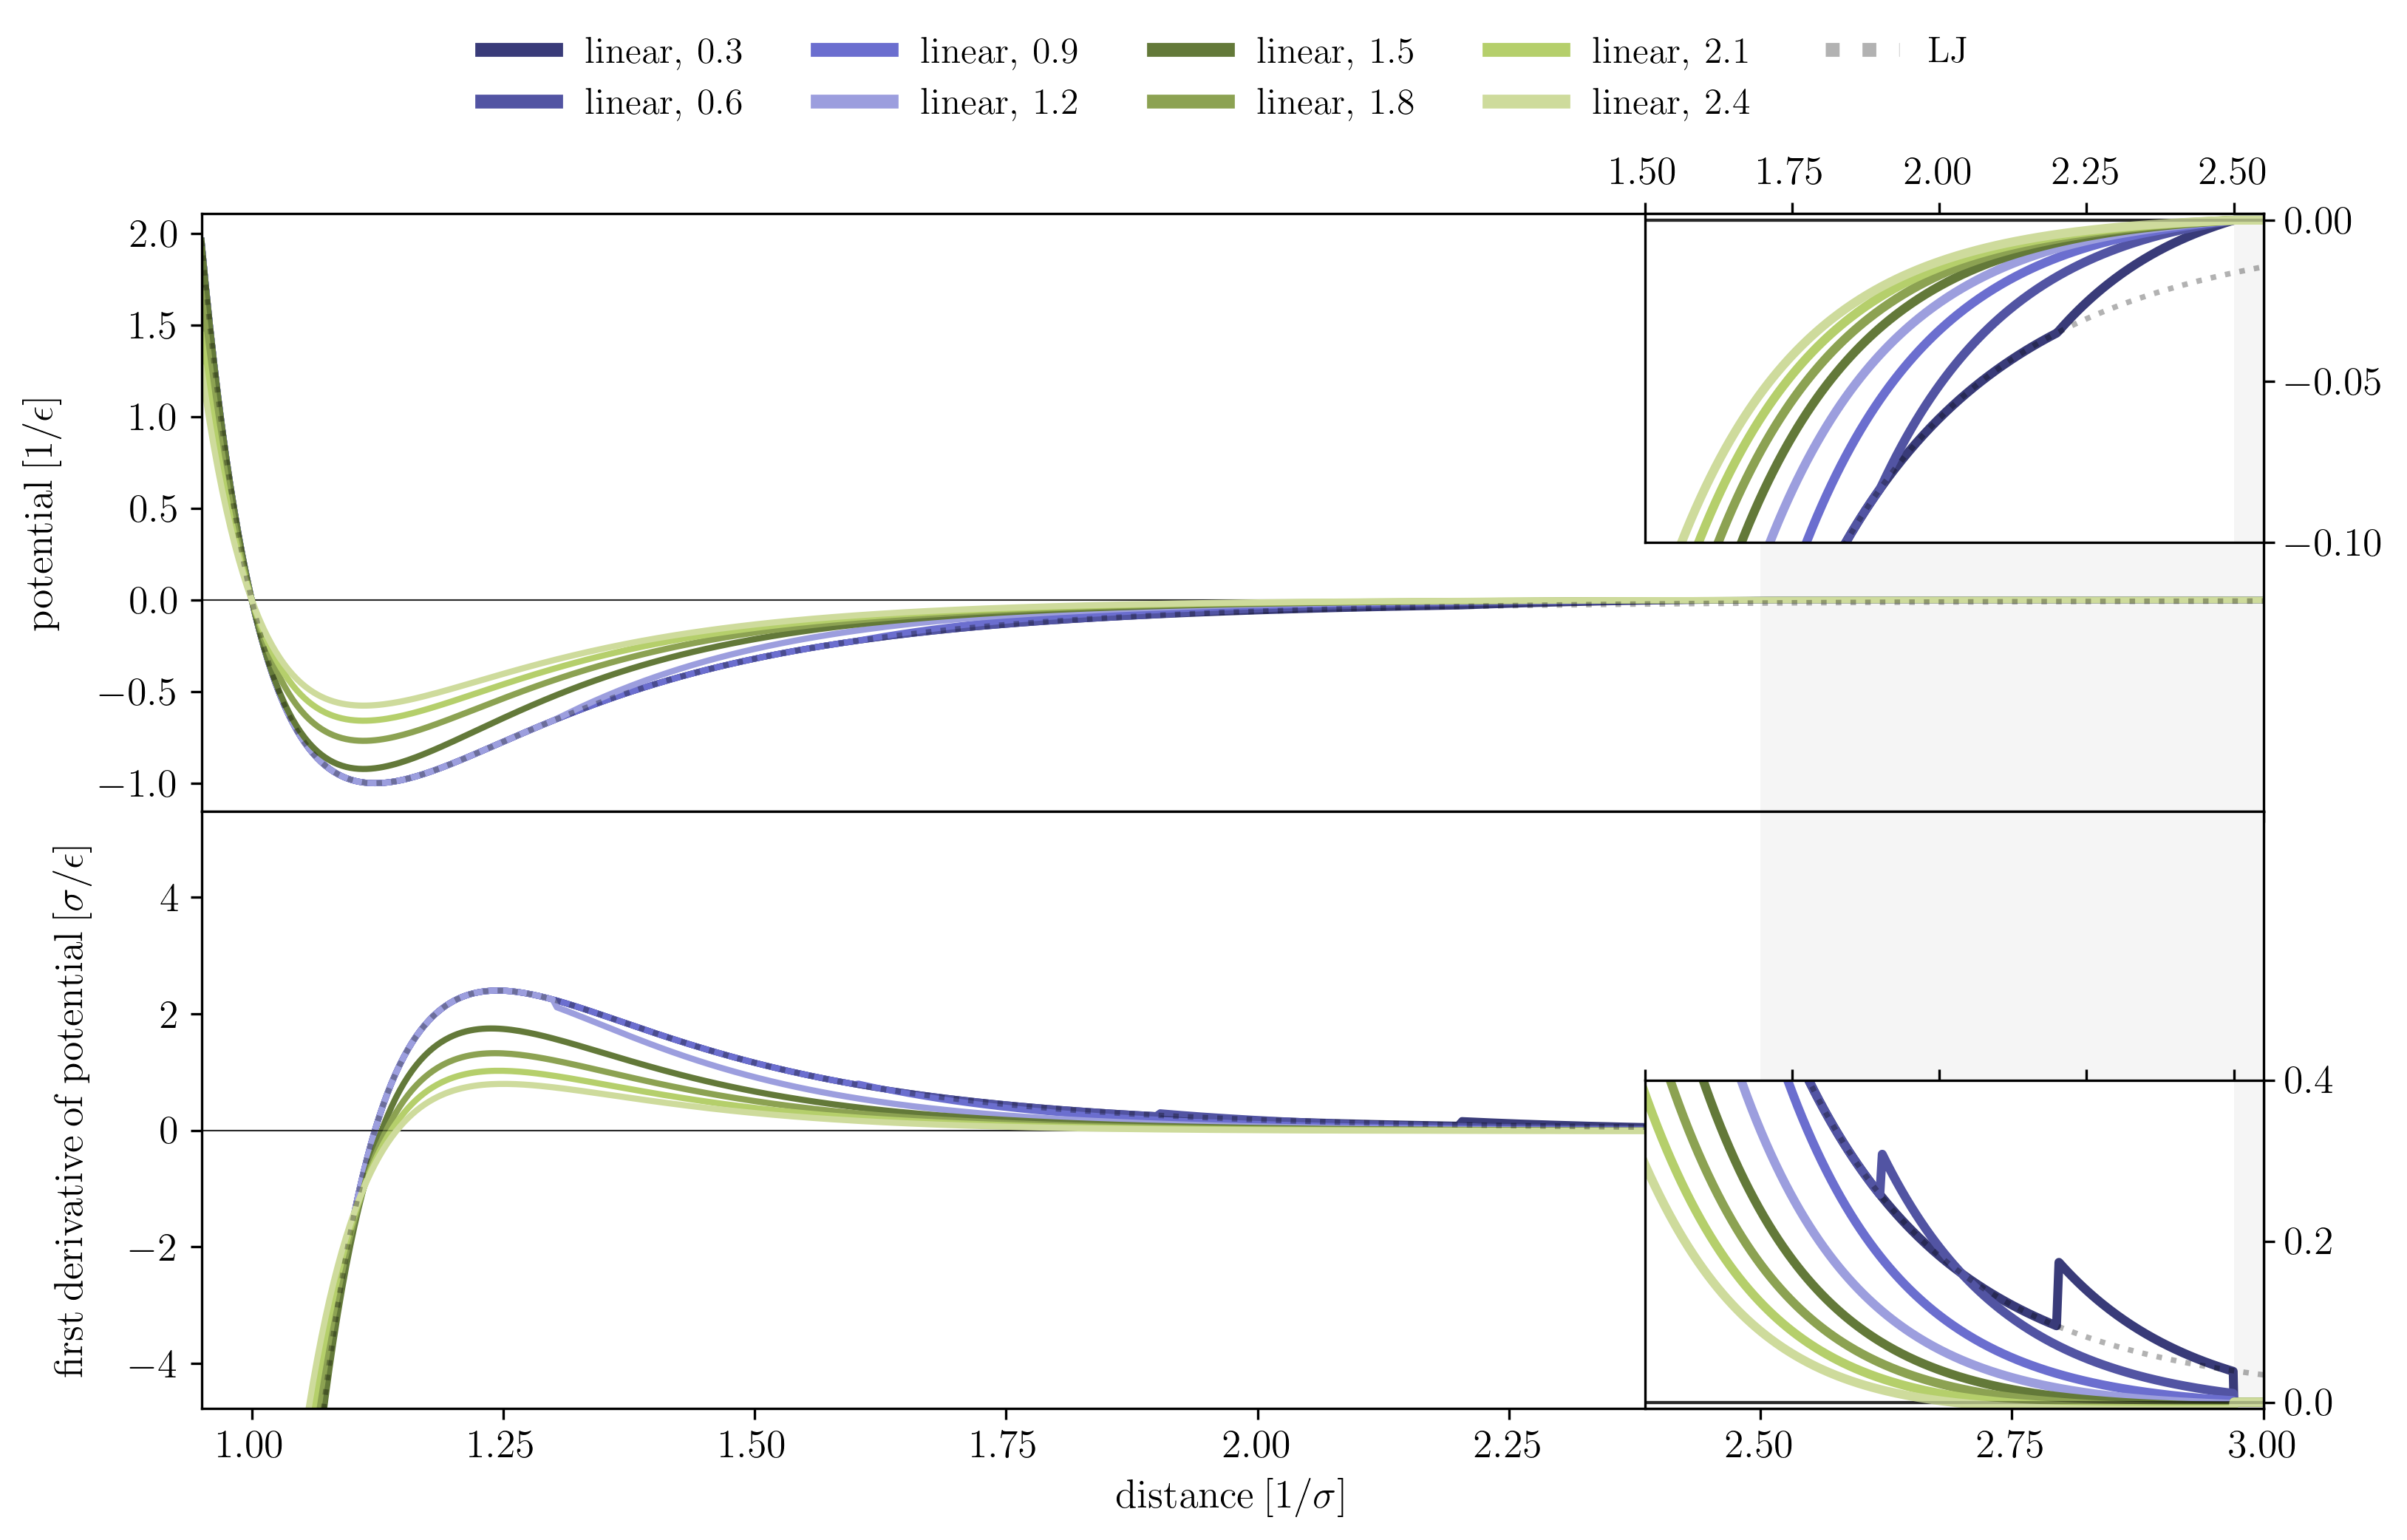

In [150]:
import os, copy
from simplemd_2.io import load_settings_from_json
import simplemd_2 as smd
from matplotlib import rc
import matplotlib.patches as mpatches
from simplemd_2.utils import format_to_tex, get_colorlist, add_points
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

# path = 'C:/Users/Michal Ptáček/Desktop/images_md'
# folder = 'E_series'

folder_path = os.path.join(pth, folder)

# var_name = "variable_settings.json"
# def_name = "default_settings.json"

# legend_font_size = 12
# legend_linewidth = 4.5
# fontsize=13
# dpi=300
# figsize=(13,7)
# xfocus = (2.3, 2.55)
# yfocus = [(-0.005, 0.001)]
# xlim = (0.95, 3)
# col_start = 1

small_ax = [None, None]
yfocus.append(np.sort(-np.array(yfocus[0])*4))
leg_labels = list()

colorlist = get_colorlist(20, start=col_start)
conf_counter = 0

plt.rcParams.update({"text.usetex": True, 'font.size': fontsize})

rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics} \usepackage[utf8]{inputenc}' )

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

fig, big_ax = plt.subplots(2,1, sharex=True, gridspec_kw={'hspace':0}, dpi=dpi, figsize=figsize)

behind_cutoff = mpatches.Rectangle((r2, -10), 5, 25, facecolor='gray', alpha=0.08)

for i, aa in enumerate(big_ax):
    small_ax[i] = mpl_il.inset_axes(aa, width='30%', height='55%', loc=i*3+1, borderpad=0)
    small_ax[i].yaxis.tick_right()
    small_ax[i].xaxis.tick_top()
    small_ax[i].set_xlim(xfocus)
    small_ax[i].set_ylim(yfocus[i])
    aa.set_xlim(xlim)

for path, subdirs, files in os.walk(folder_path):
    var_loaded = False
    def_loaded = False
    print(path, files)    
    
    if var_name in files:
        var_settings = load_settings_from_json(os.path.join(path, var_name))
        var_loaded = True
        
    if def_name in files:
        def_settings = load_settings_from_json(os.path.join(path, def_name))
        def_loaded = True
    
    print(var_loaded, def_loaded)
    assert def_loaded is var_loaded, 'One of the settings files is missing from the folder {folder} or has different name than expected.'.format(folder=path)
    
    
    if all([def_loaded, var_loaded]):
        ##################
        
        for id1, (key1, item_list1) in enumerate(var_settings.items()):
            for id2, (key2, item_list2) in enumerate(var_settings.items()):
                if key1 == key2 or id2 < id1:
                    continue

                for item1 in item_list1:
                    for item2 in item_list2:
                        st = def_settings.copy()  

                        key1 = key1.strip("_")
                        key2 = key2.strip("_")

                        if type(item1) == dict:
                            st[key1].update(item1)
                            lab1 = key1 + "_" + list(item1.keys())[0]
                            val1 = list(item1.values())[0]

                        else:
                            st[key1] = item1
                            lab1 = key1
                            val1 = item1

                        if type(item2) == dict:
                            st[key2].update(item2)
                            lab2 = key2 + "_" + list(item2.keys())[0]
                            val2 = list(item2.values())[0]

                        else:
                            st[key2] = item2
                            lab2 = key2
                            val2 = item2
                            
                        item12 = [(lab1, val1), (lab2, val2)]
                        conf_counter += 1
                        
                        str_values = str(lab1)+"--"+str(val1)+"__"+str(lab2)+"--"+str(val2)
                        leg_name = str_values.replace(":","_")
                        
                        leg_labels.append((conf_counter, leg_name))
                        
                        if conf_counter in ignore_list:
                            continue
                                          
                        ###################
                        s = st
                        sc = s['cutoff']

                        if sc['use_cutoff'] is True:
                            potential = smd.Potential(sc['potential'])
                            cutoff = smd.Cutoff(sc['cutoff_distance'],
                                            smooth_length = sc['smoothing_length'],
                                            smooth_type = sc['cutoff_smoothing'],
                                            shift = sc['shift'],
                                            n = sc['n'],
                                            c = sc['c'])
                            interactions = smd.Interactions(potential, cutoff)

                        else:
                            from simplemd_2.utils import format_interaction_function
                            print("")
                            interactions = format_interaction_function(s['interactions'])

                        xdata = np.linspace(*xlim, 500)
                        ydata = np.apply_along_axis(interactions.get_interaction, 0, xdata)  
                        
                        if sc['use_cutoff'] is True:
                            xdata, *ydata = add_points(sc['cutoff_distance'], interactions.get_interaction, xdata, *ydata)

                        for i, aa in enumerate(big_ax):
                            aa.plot([xdata[0], xdata[-1]], [0]*2, color='k', linewidth=0.5, alpha=0.2)
                            small_ax[i].plot(xdata, ydata[i], color = colorlist[conf_counter-1], linewidth=2.9)
                            small_ax[i].plot([xdata[0], xdata[-1]], [0]*2, color='k', linewidth=1.0, alpha=0.2)

                            aa.plot(xdata, ydata[i], label=format_to_tex(str(list(item1.values())[0])+", "+str(list(item2.values())[0])), linewidth= 2.0, color = colorlist[conf_counter-1])
                        
                        big_ax[0].set_ylim(bottom= 6.0 / 3.0 * ydata[0].min() )
                        big_ax[1].set_ylim(bottom= -6.0 * ydata[1].max() )

                        small_ax[1].set_xticklabels([])

if include_LJ is True:
    LJ_pot = smd.Potential("Lennard_Jones")
    #LJ_int = smd.Interactions(LJ_pot, None)
    LJ_xdata = np.linspace(*xlim, 500)
    LJ_ydata =  np.apply_along_axis(LJ_pot, 0, LJ_xdata)
    
    for ax_group in [big_ax, small_ax]:
        for i, axis in enumerate(ax_group):
            axis.plot(LJ_xdata, LJ_ydata[i], label=format_to_tex("LJ"), **LJ_kwargs)
            
            
for ax_group in [big_ax, small_ax]:
    for axis in ax_group:
        axis.add_patch(copy.copy(behind_cutoff))
                
handles, labels = big_ax[0].get_legend_handles_labels()
newLabels, newHandles = list(), list()
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)         
        handle = copy.copy(handle)
        handle.set_linewidth(legend_linewidth)
        newHandles.append(handle)                       
                        
big_ax[0].legend(newHandles, newLabels,
                 frameon=False, loc="lower center", 
               ncol=5, borderaxespad=0.0, 
               prop={'size': legend_font_size},
               bbox_transform=plt.gcf().transFigure,
               bbox_to_anchor=(0.51,0.93),
              )

labpad = 12.0
big_ax[1].set_xlabel(format_to_tex("distance ")+"$\\left[1/\sigma \\right]$")
big_ax[0].set_ylabel(format_to_tex("potential ")+"$\\left[1/\epsilon \\right]$", labelpad=labpad)
big_ax[1].set_ylabel(format_to_tex("first derivative of potential ")+"$\\left[\sigma/\epsilon \\right]$", labelpad=labpad)

print("\nCurrently active IGNORE LIST:\n", ignore_list)
print("\nLegend labels with indices:\n", leg_labels)

if type(savefig) == str:
    from simplemd_2.utils import file_saver
    save_path = file_saver(os.path.join(folder_path, savefig))
    plt.savefig(save_path, dpi=dpi, bbox_inches='tight')

plt.show()

In [ ]:
conf_counter